# Project - Spaceship Titanic

## Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pickle
import time as tm
 
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost.sklearn import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
plt.style.use(['seaborn-v0_8-deep'])
%matplotlib inline 

In [2]:
df_train = pd.read_csv('train.csv')
#df_test = pd.read_csv('test.csv')

In [3]:
df_train.shape

(8693, 14)

In [4]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [5]:
df_train.shape

(8693, 14)

In [6]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


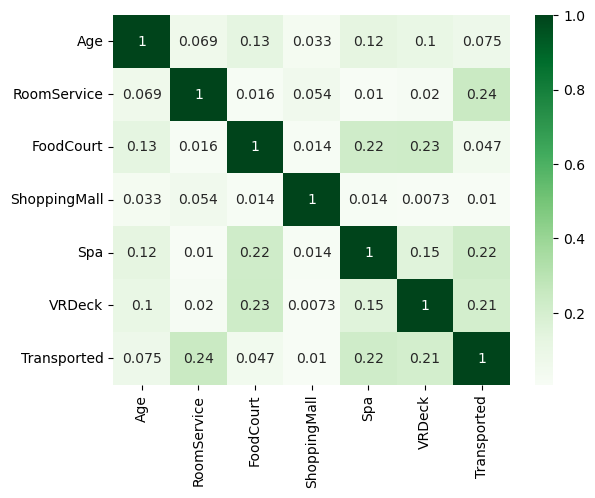

In [9]:
sns.heatmap(np.abs(df_train.corr(numeric_only=True)), annot=True, cmap='Greens')
plt.show()

## Exploratory Data Analysis (EDA) 

### Examining rows containing missing values

In [10]:
nans_dist = df_train.isna().sum(axis=1).sort_values(ascending=False).value_counts()
nans_dist

0    6606
1    1867
2     203
3      17
dtype: int64

In [11]:
nans_start = df_train[df_train.isna().sum(axis=1) >= 1]['PassengerId'].count() 
all_rows = df_train['PassengerId'].count()

In [12]:
nans_start / all_rows

0.24007822385827676

__Almost than 24% of all rows in our dataset contains at least 1 NaN__

__We will take a closer look at rows with NaNs__

- Name - Irrelevant for predictions - we will be deleting whole column so we don't have to remove rows
- VRDeck, Spa, ShoppingMall, Foodcourt, Roomservice - these are amounts spend on Spaceship so we will probably treat NaN as 0

__Other columns (VIP, Age, Destination, Cabin, CryoSleep, HomePlanet) need to be inspected in details__

__Let's see how much of dataset they are__


In [13]:
missing_values = df_train.isna().sum(axis=0)
filtered_missing_values = missing_values[missing_values>0]

In [14]:
columns_inspect_nans = ['VIP', 'Age', 'Destination', 'Cabin', 'CryoSleep', 'HomePlanet']
columns_all = list(filtered_missing_values.index)

In [15]:
explode1 = [0.1 if index==0 else 0 for index in nans_dist.index]
colors1 = ['green' if index==0 else 'orange' for index in nans_dist.index]

explode2 = [0.2 if element in columns_inspect_nans else 0 for element in columns_all]
colors2 = ['grey' if element not in columns_inspect_nans else 'orange' for element in columns_all]

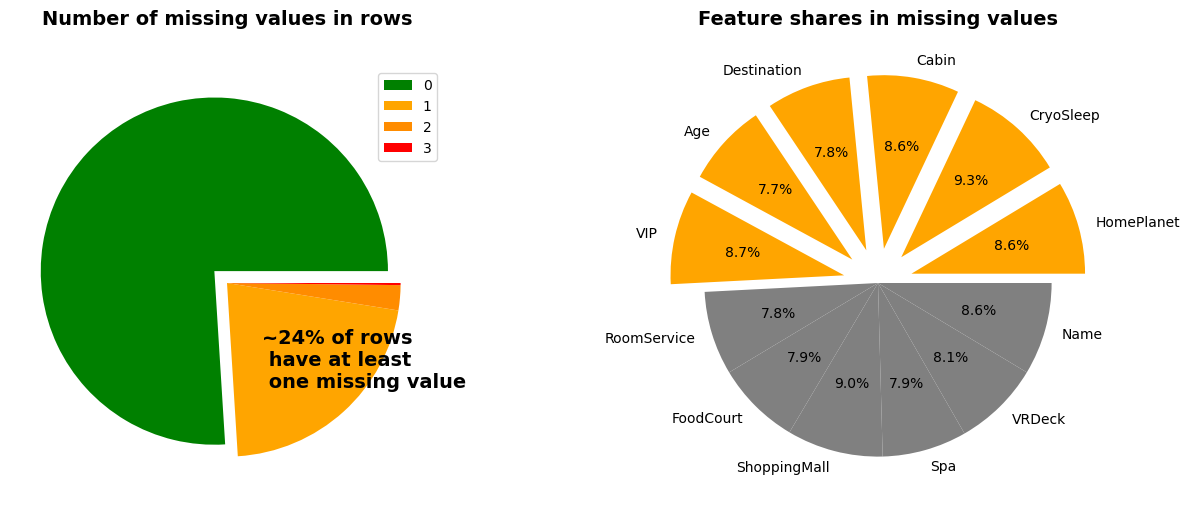

In [16]:
fig, ax = plt.subplots(1,2, figsize=(14,10))

ax[0].pie(nans_dist.values, 
          explode=explode1, 
          colors=['g','orange','darkorange','red'])

ax[0].text(0.2, -0.6, '~24% of rows\n have at least\n one missing value',weight='bold', fontsize=14)
ax[0].set_title("Number of missing values in rows",weight='bold', fontsize=14, pad=30)
ax[0].legend(labels=nans_dist.index, loc='upper right')

ax[1].pie(filtered_missing_values, 
          labels=columns_all, 
          autopct='%1.1f%%', 
          explode=explode2, 
          colors=colors2)

ax[1].set_title("Feature shares in missing values", weight='bold', fontsize=14, pad=30)
plt.subplots_adjust(wspace=0.5)
plt.show()

__It's still half of all rows with NaNs - around 12% of dataset. Too much to remove them all. We will try to find a way to fill at least some of them__

__To follow progress of filling missing values we will create DataFrame and function documenting following steps__

In [17]:
filling_nans = pd.DataFrame({'Step' : ['Start'],
                             'NaNs in feature' : [0],
                             'Filled NaNs' : [0],
                             '% of filled NaNs in feature': [0],
                             'NaNs in feature left' : [0],
                             'Overall rows with NaNs' : [nans_start],
                             'Filled NaNs as % of dataset': [0],
                             '% of rows with NaNs in dataset' : [f"{round(100*nans_start/all_rows, 2)}%"]
                            })


pd.DataFrame(filling_nans)

,Step,NaNs in feature,Filled NaNs,% of filled NaNs in feature,NaNs in feature left,Overall rows with NaNs,Filled NaNs as % of dataset,% of rows with NaNs in dataset
0,Start,0,0,0,0,2087,0,24.01%


In [18]:
def follow_fill(step_name, filling_nans):
    
    filled_nans = nans_before - nans_after
    nans_in_ds_now = df_train[df_train.isna().sum(axis=1) >= 1]['PassengerId'].count()
    
    new_step = pd.DataFrame({'Step' : [step_name],
                             'NaNs in feature' : [nans_before],
                             'Filled NaNs' : [filled_nans],
                             '% of filled NaNs in feature': [f"{round(100*filled_nans/nans_before,2)}%"],
                             'NaNs in feature left' : [nans_after],
                             'Overall rows with NaNs' : [nans_in_ds_now],
                             'Filled NaNs as % of dataset': [f"{round(100*filled_nans/all_rows, 2)}%"],
                             '% of rows with NaNs in dataset' : [f"{round(100*nans_in_ds_now/all_rows, 2)}%"]
                            })

    
    filling_nans = pd.concat([filling_nans, new_step], axis=0).reset_index(drop=True)
    
    return filling_nans

__After every step, we will use the function above to follow progress__

### PassengerID - GroupID and number within group

__As we can read in dataset description:__

_PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always._

__We can divide this feature into GroupID and number within group__

__After that we will replace _number within group_ with number of co-passengers traveling with each person. We will do it by assigning every person maximum value of _number within group_ from its group and then we subtract one from that__

__Informations from co-passengers may be useful when filling missing values later__

In [19]:
df_train['GroupID'] = df_train['PassengerId'].str[:4]
df_train['WithinGroup'] = df_train['PassengerId'].str[-1:].astype(int)

In [20]:
# df_train['WithinGroup']==2] selects all group where number '2' appears which means we select all groups where there are more than one person

groups_more_passengers = df_train[df_train['WithinGroup']==2]['GroupID']
groups_more_passengers

3       0003
7       0006
10      0008
20      0017
22      0020
        ... 
8670    9252
8679    9267
8683    9272
8686    9275
8692    9280
Name: GroupID, Length: 1412, dtype: object

In [21]:
# Loop below iterates through all multi-person groups, finds maximum value of number 'WithinGroup' and assigns this
# number to all people in group. Then we subtract one from this column -> new column 'CoPassengers' reflects number
# of people traveling with each person

for group in groups_more_passengers:
    
    passengers_in_group = df_train[df_train['GroupID']==group]['WithinGroup'].max()
    df_train.loc[df_train[df_train['GroupID']==group].index, 'WithinGroup'] = passengers_in_group
    
df_train['CoPassengers'] = df_train['WithinGroup'] - 1
df_train.drop('WithinGroup', axis=1, inplace=True)

In [22]:
group_size = df_train.value_counts('CoPassengers')
group_size

CoPassengers
0    4805
1    1682
2    1020
3     412
4     265
6     231
5     174
7     104
dtype: int64

In [23]:
explode = [0.1 if index==0 else 0 for index in group_size.index]
colors = ['grey' if idx == 0 else plt.cm.Greens((4+idx/2)/len(group_size)) for idx in range(len(group_size))]

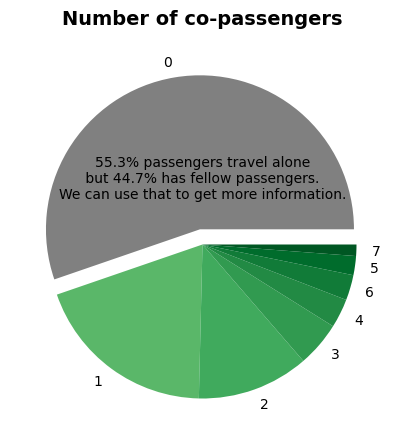

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(group_size, colors=colors, labels=group_size.index, explode=explode)
ax.set_title('Number of co-passengers', pad=20, weight='bold', fontsize=14)
alone_pct = round(100*group_size.values[0]/group_size.values.sum(),1)
text=f'{alone_pct}% passengers travel alone\n but {100-alone_pct}% has fellow passengers. \nWe can use that to get more information.'
ax.text(0,0.3, text, fontsize=10, ha='center')
plt.show()

In [25]:
df_train[df_train['CoPassengers']==7]
df_train[df_train['GroupID']=='0984']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,CoPassengers
910,0984_01,Earth,False,G/150/S,TRAPPIST-1e,45.0,False,0.0,1.0,13.0,0.0,873.0,Wen Woodwin,False,0984,7
911,0984_02,Earth,False,F/182/S,TRAPPIST-1e,24.0,False,0.0,0.0,718.0,0.0,0.0,NaN,False,0984,7
912,0984_03,Earth,False,G/150/S,TRAPPIST-1e,23.0,False,0.0,0.0,490.0,0.0,319.0,Morrie Sweekstarks,False,0984,7
913,0984_04,Earth,True,G/150/S,TRAPPIST-1e,30.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Sweekstarks,True,0984,7
914,0984_05,Earth,False,F/182/S,55 Cancri e,20.0,False,0.0,11.0,0.0,136.0,1088.0,Greggy Sweekstarks,False,0984,7
915,0984_06,Earth,True,G/150/S,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Walley Sweekstarks,True,0984,7
916,0984_07,Earth,True,G/150/S,PSO J318.5-22,NaN,False,0.0,0.0,0.0,0.0,0.0,Shery Flemaney,False,0984,7
917,0984_08,Earth,True,G/150/S,TRAPPIST-1e,71.0,False,0.0,0.0,0.0,0.0,0.0,Alancy Flemaney,True,0984,7


__As we can see above, information on HomePlanet, Cabin, Destination or CryoSleep may differ within groups.__

__We need closer examination before filling NaNs based on co-passengers__

In [26]:
travel_with_someone = df_train[df_train['CoPassengers']!=0]

In [27]:
print(f'There are {travel_with_someone[columns_inspect_nans].isna().sum().sum()} missing values that ' 
      'may be potentialy filled using info from co-passengers if they are compatible within groups')

travel_with_someone[columns_inspect_nans].isna().sum()

There are 552 missing values that may be potentialy filled using info from co-passengers if they are compatible within groups


VIP             89
Age             82
Destination     79
Cabin          100
CryoSleep      110
HomePlanet      92
dtype: int64

__We can expect that values like: HomePlanet, CryoSleep, Cabin, Destination and VIP may be significantly compatible within the groups. Let's check it__

In [28]:
columns_to_check = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [29]:
df_temp = df_train[['GroupID', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']]

In [30]:
# We have to change all values to string so loop can work properly

df_temp = df_temp.fillna('Unknown')
df_temp['CryoSleep'] = df_temp['CryoSleep'].astype('string')
df_temp['VIP'] = df_temp['VIP'].astype('string')

In [31]:
# Loop below will check the compatibility of feature values within groups. First it will iterate throguh columns we selected
# In each column, second loop will iterate through each multi-person group, finds mode of the group and check how many 
# people have the same value as mode. It will give us a hint on which features are compatible within groups, so we will
# have better insight if we can fill missing values based on co-passengers

length = len(travel_with_someone)
compatibility = []

for column in columns_to_check:
    comp_count = 0
    for group in groups_more_passengers:

        column_mode = df_temp[df_temp['GroupID']==group][column].mode()[0]
        
        for index, passenger in df_temp[df_temp['GroupID']==group].iterrows():
            if passenger[column] == column_mode:
                comp_count += 1

    compatibility.append(comp_count/length)       

In [32]:
compatibility_df = pd.DataFrame({'Feature' : columns_to_check, 'Compatibility' : compatibility})\
                                .sort_values(by='Compatibility', ascending=False).reset_index(drop=True)
compatibility_df

,Feature,Compatibility
0,HomePlanet,0.976852
1,VIP,0.950360
2,Cabin,0.850823
3,Destination,0.756173
4,CryoSleep,0.726337


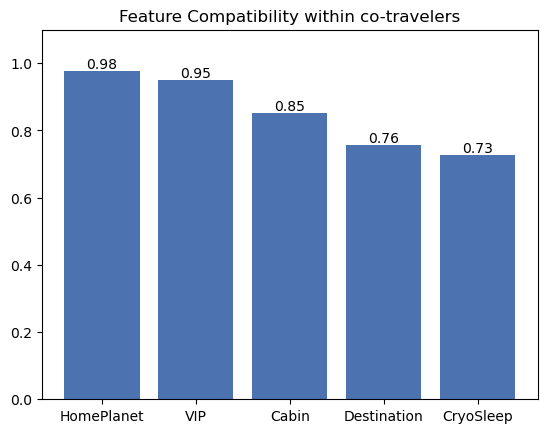

In [33]:
bar = plt.bar(data=compatibility_df, x='Feature', height='Compatibility')
plt.bar_label(bar, fmt='%.2f')
plt.title('Feature Compatibility within co-travelers')
plt.ylim(0,1.1)
plt.show()

__As we can see there is strong compatibility on features within groups, especially on HomePlanet, VIP and Cabin__

__We will probably use those information while filling missing values__

### Home Planet

__First, we will prepare function to view basic information on specific feature__

In [34]:
def basic_info(feature):
    
    print(f'\033[1mFEATURE: {feature}\033[0m\n')
    print('\033[1mVALUE COUNTS:\033[0m\n')
    print(df_train[feature].value_counts().to_string())
    print('\n\033[1mMISSING VALUES:\033[0m\n')
    print(f'All missing values: \t\t{df_train.isna().sum().loc[feature]}')
    print(f'Traveling in group: \t\t{travel_with_someone[columns_inspect_nans].isna().sum().loc[feature]}')
    print(f"Compatibility within group: \t{round(compatibility_df[compatibility_df['Feature']==feature].iloc[0,1],2)}")
    
    plt.pie(df_train[feature].value_counts(), 
        autopct='%1.1f%%', 
        labels=df_train[feature].value_counts().index)

FEATURE: HomePlanet

VALUE COUNTS:

Earth     4602
Europa    2131
Mars      1759

MISSING VALUES:

All missing values: 		201
Traveling in group: 		92
Compatibility within group: 	0.98


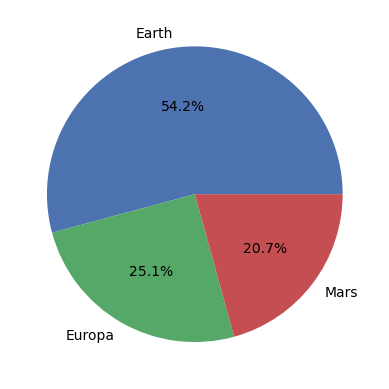

In [35]:
basic_info('HomePlanet')

__First, let's check what the compatibility is between Destination Planet and Home Planet and how it varies based on Destination Planet. If we are about to fill missing values randomly in training or later in test dataset, it's better to use probabilities based on some premises than on those for whole population. Home Planet might be the best premise__

In [36]:
# creating empty DataFrame containing two features we are about to inspect.
Dest_Home = pd.DataFrame({'Destination':[], 'HomePlanet':[]})

# we take unique values of destination planet (only 3 first values because 4th is 'nan')
dest_planets = sorted(df_train['Destination'].unique().tolist()[0:3])

# For every destination planet we count normalized values of HomePlanet and then concatenate it into one DataFrame
for planet in dest_planets:
    
    Dest = pd.DataFrame(df_train[df_train['Destination']==planet]['HomePlanet'].value_counts(normalize=True))
    Dest['Destination'] = planet
    Dest_Home = pd.concat([Dest_Home, Dest])

# making DataFrame look clearly
Dest_Home = Dest_Home.reset_index().\
                      rename(columns={'index':'HomePlanet', 'HomePlanet':'Home%'}).\
                      sort_values('Home%', ascending=False).reset_index(drop=True)\
                      [['Destination', 'HomePlanet', 'Home%']]

Dest_Home

,Destination,HomePlanet,Home%
0,PSO J318.5-22,Earth,0.912821
1,TRAPPIST-1e,Earth,0.537901
2,55 Cancri e,Europa,0.500848
3,55 Cancri e,Earth,0.390051
4,TRAPPIST-1e,Mars,0.255854
5,TRAPPIST-1e,Europa,0.206245
6,55 Cancri e,Mars,0.109101
7,PSO J318.5-22,Mars,0.062821
8,PSO J318.5-22,Europa,0.024359


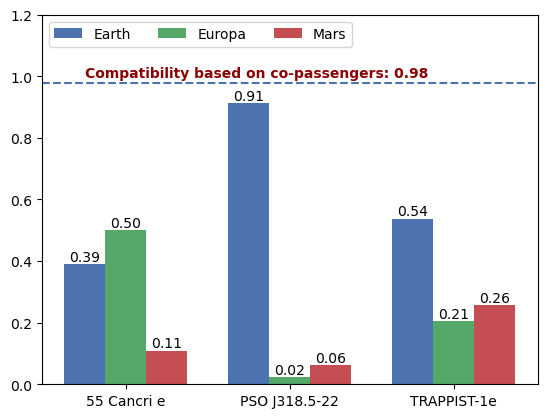

In [37]:
# we take unique values of home planet (only 3 first values because 4th is 'nan')
home_planets = sorted(df_train['HomePlanet'].unique().tolist()[0:3])

# preparing variables needed to create a specific bar chart
x = np.arange(len(home_planets))
width = 0.25
multiplier = 0

fig, ax = plt.subplots()

# we create three bars for every home planet. Every iteration creates three bars: one home planet for every destination
# these bars are located at x=[0,1,2] + offset added in every iteration
for home_planet in home_planets:
        
    temp_df = Dest_Home[Dest_Home['HomePlanet'] == home_planet].sort_values(by='Destination')
    offset= width * multiplier
    bar = ax.bar(x + offset, temp_df['Home%'], width, label=home_planet)
    ax.bar_label(bar, fmt='%.2f')

    multiplier += 1

ax.legend(loc='upper left', ncols=3)
comp_home = compatibility_df[compatibility_df["Feature"]=="HomePlanet"].iloc[0,1]
plt.axhline(comp_home, linestyle='--')
plt.text(0, comp_home+0.02, f'Compatibility based on co-passengers: {round(comp_home,2)}', weight='bold', color='darkred')
ax.set_xticks(x + width, dest_planets)
ax.set_ylim(0,1.2)
plt.show()

__We have a significant compatibility on HomePlanet within groups (~98%) so firstly we will fill all missing values for people traveling with co-passengers with mode of their group. After that we will fill the rest randomly with probabilities based on Home Planet__

__We will create custom transformer dedicated to fill missing values with mode based on co-passengers.__

In [38]:
class ImputeBasedOnGroup(BaseEstimator, TransformerMixin):
    
    def __init__(self, feature):
        
        self.feature = feature
        
# values found in fit method will be stored in impute_values dictionary and used in transform method

        self.impute_values = {}
        
    def fit(self, X, y=None):

# We will use a slighlty modified loop, we used to find mode value few cells above. Function will inspect passengers traveling
# in groups and fill missing values with mode of the group. However we have to implement simple
# error handling for rare situations where all people within group have NaN value in column. In such case, loop will 
# skip group.
        
        for group in groups_more_passengers:
            try:
                mode = X[X['GroupID']==group][self.feature].mode()[0]
                self.impute_values[group] = mode
            except:
                self.impute_values[group] = np.nan
        return self
                
    def transform(self, X, y=None):
        
        for group in groups_more_passengers:
            value_to_impute = self.impute_values[group]
            X.loc[X[(X['GroupID']==group) & (X[self.feature].isna())].index, self.feature] = value_to_impute
        return X

In [39]:
group_imputer_hp = ImputeBasedOnGroup(feature='HomePlanet')
nans_before = df_train['HomePlanet'].isna().sum()
df_train = group_imputer_hp.fit_transform(df_train)
nans_after = df_train['HomePlanet'].isna().sum()

In [40]:
filling_nans = follow_fill('HomePlanet based on co-passengers', filling_nans)
filling_nans

,Step,NaNs in feature,Filled NaNs,% of filled NaNs in feature,NaNs in feature left,Overall rows with NaNs,Filled NaNs as % of dataset,% of rows with NaNs in dataset
0,Start,0,0,0,0,2087,0,24.01%
1,HomePlanet based on co-passengers,201,90,44.78%,111,2010,1.04%,23.12%


__Second step is to fill the rest of missing values (people traveling in groups left and people traveling alone) with probability based on Destination point.__

__As we could seen on charts above, pairs of HomePlanet - Destination are strongly related__

__For example: In whole population 54% of passengers travel from Earth, but if they travel to PSO J318.5-22, there is 91% probability that they travel from Earth. 
We will fill missing values with mode based on Destination planet__

__Second transformer we create will find mode or mean of feature based on value in other feature.__

In [41]:
class ImputeBasedOnOtherFeature(BaseEstimator, TransformerMixin):
    
    def __init__(self, method, base_feature, filled_feature):
        
        self.method = method
        self.base_feature = base_feature
        self.filled_feature = filled_feature
        self.impute_values = {}
            
    def fit(self, X, y=None):
        
# list comprehension below will look for unique values of base feature and remove nan value from this list

        self.unique_based_values = [value for value in X[self.base_feature].unique().tolist() if str(value) != 'nan']
        
        if self.method == 'mode':
            for value in self.unique_based_values:
                mode = X[X[self.base_feature]==value][self.filled_feature].mode()[0]
                self.impute_values[value] = mode              
            
        elif self.method == 'mean':
            for value in self.unique_based_values:
                mean = X[X[self.base_feature]==value][self.filled_feature].mean()
                self.impute_values[value] = mean
                    
        else:
            raise Exception("Available methods: mode, mean")
            
        return self
    
    def transform(self, X, y=None):
        
        for value in self.unique_based_values:
            value_to_impute = self.impute_values[value]
            X.loc[X[(X[self.base_feature]==value) & (X[self.filled_feature].isna())].index, self.filled_feature] = value_to_impute
            
        return X

In [42]:
other_feature_imputer_hp = ImputeBasedOnOtherFeature(method='mode', base_feature='Destination', filled_feature='HomePlanet')
nans_before = df_train['HomePlanet'].isna().sum()
df_train = other_feature_imputer_hp.fit_transform(df_train)
nans_after = df_train['HomePlanet'].isna().sum()

In [43]:
filling_nans = follow_fill('HomePlanet based on Destination', filling_nans)
filling_nans

,Step,NaNs in feature,Filled NaNs,% of filled NaNs in feature,NaNs in feature left,Overall rows with NaNs,Filled NaNs as % of dataset,% of rows with NaNs in dataset
0,Start,0,0,0,0,2087,0,24.01%
1,HomePlanet based on co-passengers,201,90,44.78%,111,2010,1.04%,23.12%
2,HomePlanet based on Destination,111,108,97.3%,3,1924,1.24%,22.13%


__As we can see above we have still 3 rows with missing values left. This is situation where both HomePlanet and Destination are empty__

In [44]:
df_train[df_train['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,CoPassengers
347,0382_01,NaN,False,G/64/P,NaN,23.0,False,348.0,0.0,0.0,4.0,368.0,Blanie Floydendley,False,0382,0
5208,5555_01,NaN,False,G/896/S,NaN,43.0,NaN,1.0,0.0,213.0,7.0,701.0,Winia Blanglison,True,5555,0
5687,6031_01,NaN,False,F/1146/S,NaN,52.0,False,0.0,645.0,0.0,0.0,395.0,Bobara Alshipson,True,6031,0


### CryoSleep

FEATURE: CryoSleep

VALUE COUNTS:

False    5439
True     3037

MISSING VALUES:

All missing values: 		217
Traveling in group: 		110
Compatibility within group: 	0.73


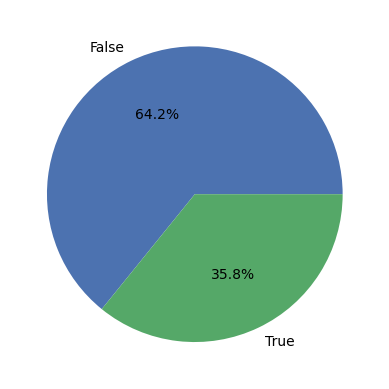

In [45]:
basic_info('CryoSleep')

__We will see if CryoSleep ratio differs according to passenger Route (pair HomePlanet -> Destination). If positive, we will random fill based on Route__

In [46]:
# we will check CryoSleep ratio based on Route (pair HomePlanet -> Destination)
route_sleep = df_train.groupby(['HomePlanet', 'Destination'])['CryoSleep'].mean().to_frame().\
                sort_values(by='CryoSleep').reset_index()
route_sleep['Route'] = route_sleep["HomePlanet"] +' -> ' + route_sleep["Destination"]
route_sleep = route_sleep[['HomePlanet', 'Destination', 'Route', 'CryoSleep']]
route_sleep

,HomePlanet,Destination,Route,CryoSleep
0,Mars,PSO J318.5-22,Mars -> PSO J318.5-22,0.229167
1,Earth,TRAPPIST-1e,Earth -> TRAPPIST-1e,0.267863
2,Earth,55 Cancri e,Earth -> 55 Cancri e,0.304412
3,Europa,TRAPPIST-1e,Europa -> TRAPPIST-1e,0.387946
4,Mars,TRAPPIST-1e,Mars -> TRAPPIST-1e,0.391542
5,Mars,55 Cancri e,Mars -> 55 Cancri e,0.402116
6,Europa,PSO J318.5-22,Europa -> PSO J318.5-22,0.473684
7,Earth,PSO J318.5-22,Earth -> PSO J318.5-22,0.511268
8,Europa,55 Cancri e,Europa -> 55 Cancri e,0.514092


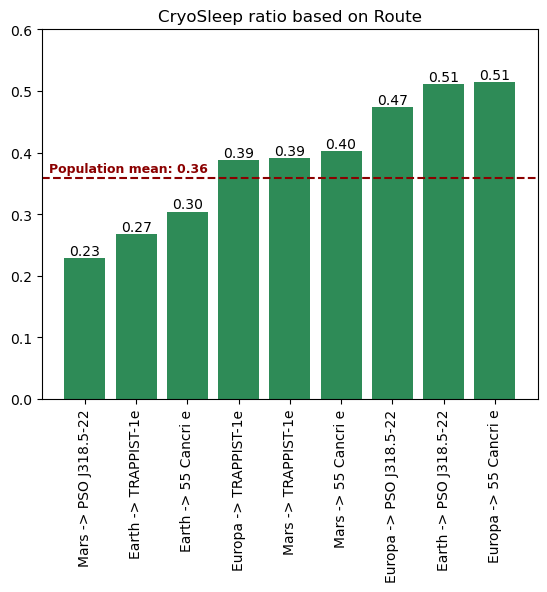

In [47]:
sleep_avg = df_train['CryoSleep'].mean()

bar = plt.bar(x=route_sleep['Route'], height=route_sleep['CryoSleep'], color='seagreen')
plt.bar_label(bar, fmt='%.2f')
plt.axhline(sleep_avg, ls='--', color='darkred')
plt.text(-0.7, sleep_avg+0.01, f'Population mean: {round(sleep_avg,2)}', weight='bold', color='darkred', fontsize=9)
plt.xticks(rotation=90)
plt.ylim(0,0.6)
plt.title('CryoSleep ratio based on Route')
plt.show()

__Although this featue is not that compatibile as HomePlanet we will still fill values based on co-passengers and later randomly based on probability of CryoSleep according to passenger Route (pair HomePlanet -> Destination)__

In [48]:
group_imputer_sleep = ImputeBasedOnGroup(feature='CryoSleep')
nans_before = df_train['CryoSleep'].isna().sum()
df_train = group_imputer_sleep.fit_transform(df_train)
nans_after = df_train['CryoSleep'].isna().sum()

In [49]:
filling_nans = follow_fill('CryoSleep based on co-passengers', filling_nans)
filling_nans

,Step,NaNs in feature,Filled NaNs,% of filled NaNs in feature,NaNs in feature left,Overall rows with NaNs,Filled NaNs as % of dataset,% of rows with NaNs in dataset
0,Start,0,0,0,0,2087,0,24.01%
1,HomePlanet based on co-passengers,201,90,44.78%,111,2010,1.04%,23.12%
2,HomePlanet based on Destination,111,108,97.3%,3,1924,1.24%,22.13%
3,CryoSleep based on co-passengers,217,108,49.77%,109,1838,1.24%,21.14%


__Another transformer will look for probabilities of values in dataset according to base feature__

In [50]:
class ImputeBasedOnProbabilities(BaseEstimator, TransformerMixin):
    
    def __init__(self, base_feature, filled_feature):
        self.base_feature = base_feature
        self.filled_feature = filled_feature
        self.fill_criterions = []
        self.fill_probabilities = []

# function below will be applied on every row -> if the value is missing it will fill it with probability based on calculations
        
    def fill_empty(self, value, fill_values, fill_probabilities):
        if pd.isnull(value):
            return np.random.choice(fill_values, p=fill_probabilities)
        else:
            return value        

    def fit(self, X, y=None):
        self.fill_criterions = sorted([value for value in X[self.base_feature].unique().tolist() if not pd.isna(value)])
        self.fill_probabilities = X.groupby(self.base_feature)[self.filled_feature].mean().to_list()
        self.fill_values = [1 - value for value in X[self.filled_feature].dropna().unique().tolist()]
        
        return self
    
    def transform(self, X, y=None):
        for criterion, probability in zip(self.fill_criterions, self.fill_probabilities):
            mask = X[self.base_feature] == criterion
            X.loc[mask, self.filled_feature] = X[mask][self.filled_feature].apply(self.fill_empty, args=(self.fill_values, [probability, 1 - probability]))

        return X

In [51]:
df_train['Route'] = df_train["HomePlanet"] +' -> ' + df_train["Destination"]

In [52]:
probability_imputer_sleep = ImputeBasedOnProbabilities(base_feature='Route', filled_feature='CryoSleep')
nans_before = df_train['CryoSleep'].isna().sum()
df_train = probability_imputer_sleep.fit_transform(df_train)
nans_after = df_train['CryoSleep'].isna().sum()

In [53]:
filling_nans = follow_fill('CryoSleep based on route', filling_nans)
filling_nans

,Step,NaNs in feature,Filled NaNs,% of filled NaNs in feature,NaNs in feature left,Overall rows with NaNs,Filled NaNs as % of dataset,% of rows with NaNs in dataset
0,Start,0,0,0,0,2087,0,24.01%
1,HomePlanet based on co-passengers,201,90,44.78%,111,2010,1.04%,23.12%
2,HomePlanet based on Destination,111,108,97.3%,3,1924,1.24%,22.13%
3,CryoSleep based on co-passengers,217,108,49.77%,109,1838,1.24%,21.14%
4,CryoSleep based on route,109,108,99.08%,1,1755,1.24%,20.19%


In [54]:
df_train['CryoSleep'] = df_train['CryoSleep'].astype('bool').astype('int')

### Cabin

In [55]:
print('\n\033[1mMISSING VALUES:\033[0m\n')
print(f'All missing values: \t\t{df_train.isna().sum().loc["Cabin"]}')
print(f'Traveling in group: \t\t{travel_with_someone[columns_inspect_nans].isna().sum().loc["Cabin"]}')
print(f'Compatibility within group: \t{round(compatibility_df[compatibility_df["Feature"]=="Cabin"].iloc[0,1],2)}')


MISSING VALUES:

All missing values: 		199
Traveling in group: 		100
Compatibility within group: 	0.85


__Cabin also has good compatibility within group (~85%) and we don't have other sensible hints, how to fill missing those values so we will fill them based on co-passengers__

In [56]:
group_imputer_cabin = ImputeBasedOnGroup(feature='Cabin')
nans_before = df_train['Cabin'].isna().sum()
df_train = group_imputer_cabin.fit_transform(df_train)
nans_after = df_train['Cabin'].isna().sum()

In [57]:
filling_nans = follow_fill('Cabin based on co-passengers', filling_nans)
filling_nans

,Step,NaNs in feature,Filled NaNs,% of filled NaNs in feature,NaNs in feature left,Overall rows with NaNs,Filled NaNs as % of dataset,% of rows with NaNs in dataset
0,Start,0,0,0,0,2087,0,24.01%
1,HomePlanet based on co-passengers,201,90,44.78%,111,2010,1.04%,23.12%
2,HomePlanet based on Destination,111,108,97.3%,3,1924,1.24%,22.13%
3,CryoSleep based on co-passengers,217,108,49.77%,109,1838,1.24%,21.14%
4,CryoSleep based on route,109,108,99.08%,1,1755,1.24%,20.19%
5,Cabin based on co-passengers,199,100,50.25%,99,1672,1.15%,19.23%


In [58]:
df_train['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

__As we can read in dataset description:__

_The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard_

__Beacuse deck or side may be useful information, we will divide Cabin onto Deck and Side. Number of Cabin is rather unique so it won't bring any value to building model - we will delete it__

In [59]:
df_train['Deck'] = df_train['Cabin'].str[:1]

In [60]:
df_train['Deck'].value_counts(normalize=True)

F    0.326972
G    0.301140
E    0.102979
B    0.092623
C    0.088550
D    0.056667
A    0.030486
T    0.000582
Name: Deck, dtype: float64

In [61]:
df_train['Side'] = df_train['Cabin'].str[-1:]

In [62]:
df_train['Side'].value_counts(normalize=True)

S    0.505353
P    0.494647
Name: Side, dtype: float64

In [63]:
df_train = df_train.drop(columns='Cabin')

### Destination

__As we established, compatibility of 'Destination' within groups is around 76%.__

__Let's check if HomePlanet isn't stronger predictor__

FEATURE: Destination

VALUE COUNTS:

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796

MISSING VALUES:

All missing values: 		182
Traveling in group: 		79
Compatibility within group: 	0.76


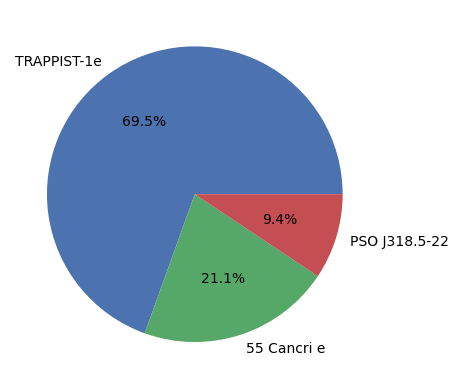

In [64]:
basic_info('Destination')

In [65]:
Home_Dest = pd.DataFrame({'Destination':[], 'HomePlanet':[]})

for planet in home_planets:
    
    Home = pd.DataFrame(df_train[df_train['HomePlanet']==planet]['Destination'].value_counts(normalize=True))
    Home['HomePlanet'] = planet
    Home_Dest = pd.concat([Home_Dest, Home])

Home_Dest = Home_Dest.reset_index().\
                      rename(columns={'index':'Destination', 'Destination':'Dest%'}).\
                      sort_values('Dest%', ascending=False).reset_index(drop=True)\
                      [['HomePlanet', 'Destination', 'Dest%']]

In [66]:
Home_Dest

,HomePlanet,Destination,Dest%
0,Mars,TRAPPIST-1e,0.860172
1,Earth,TRAPPIST-1e,0.692973
2,Europa,TRAPPIST-1e,0.564689
3,Europa,55 Cancri e,0.426436
4,Earth,PSO J318.5-22,0.157189
5,Earth,55 Cancri e,0.149838
6,Mars,55 Cancri e,0.111175
7,Mars,PSO J318.5-22,0.028653
8,Europa,PSO J318.5-22,0.008874


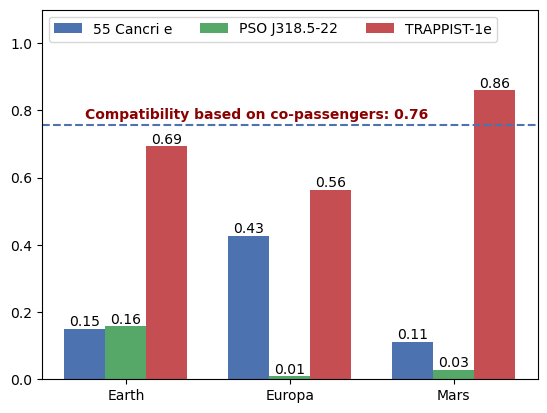

In [67]:
home = sorted(Home_Dest['HomePlanet'].unique().tolist())
dest = sorted(Home_Dest['Destination'].unique().tolist())

x = np.arange(3)
width = 0.25
multiplier = 0

fig, ax = plt.subplots()

for dest_planet in dest:
        
    temp_df = Home_Dest[Home_Dest['Destination'] == dest_planet].sort_values(by='HomePlanet')
    offset= width * multiplier
    bar = ax.bar(x + offset, temp_df['Dest%'], width, label=dest_planet)
    ax.bar_label(bar, fmt='%.2f')

    multiplier += 1

ax.legend(loc='upper left', ncols=3)
comp_dest = compatibility_df[compatibility_df["Feature"]=="Destination"].iloc[0,1]
plt.axhline(comp_dest, linestyle='--')
plt.text(0, comp_dest+0.02, f'Compatibility based on co-passengers: {round(comp_dest,2)}', weight='bold', color='darkred')
ax.set_xticks(x + width, home)
ax.set_ylim(0,1.1)
plt.show()

__As before, we will fill missing values based on co-passengers and then with mode based on HomePlanet__

In [68]:
group_imputer_dest = ImputeBasedOnGroup(feature='Destination')
nans_before = df_train['Destination'].isna().sum()
df_train = group_imputer_dest.fit_transform(df_train)
# we need to update 'Route' every time we fill 'Destination' or 'HomePlanet' in order to count overall rows with NaNs properly 
df_train['Route'] = df_train["HomePlanet"] +' -> ' + df_train["Destination"]
nans_after = df_train['Destination'].isna().sum()

In [69]:
filling_nans = follow_fill('Destination based on co-passengers', filling_nans)
filling_nans

,Step,NaNs in feature,Filled NaNs,% of filled NaNs in feature,NaNs in feature left,Overall rows with NaNs,Filled NaNs as % of dataset,% of rows with NaNs in dataset
0,Start,0,0,0,0,2087,0,24.01%
1,HomePlanet based on co-passengers,201,90,44.78%,111,2010,1.04%,23.12%
2,HomePlanet based on Destination,111,108,97.3%,3,1924,1.24%,22.13%
3,CryoSleep based on co-passengers,217,108,49.77%,109,1838,1.24%,21.14%
4,CryoSleep based on route,109,108,99.08%,1,1755,1.24%,20.19%
5,Cabin based on co-passengers,199,100,50.25%,99,1672,1.15%,19.23%
6,Destination based on co-passengers,182,79,43.41%,103,1607,0.91%,18.49%


__We will fill rest with mode based on HomePlanet__

In [70]:
other_feature_imputer_dest = ImputeBasedOnOtherFeature(method='mode', base_feature='HomePlanet', filled_feature='Destination')
nans_before = df_train['Destination'].isna().sum()
df_train = other_feature_imputer_dest.fit_transform(df_train)
df_train['Route'] = df_train["HomePlanet"] +' -> ' + df_train["Destination"]
nans_after = df_train['Destination'].isna().sum()

In [71]:
filling_nans = follow_fill('Destination based on HomePlanet', filling_nans)
filling_nans

,Step,NaNs in feature,Filled NaNs,% of filled NaNs in feature,NaNs in feature left,Overall rows with NaNs,Filled NaNs as % of dataset,% of rows with NaNs in dataset
0,Start,0,0,0,0,2087,0,24.01%
1,HomePlanet based on co-passengers,201,90,44.78%,111,2010,1.04%,23.12%
2,HomePlanet based on Destination,111,108,97.3%,3,1924,1.24%,22.13%
3,CryoSleep based on co-passengers,217,108,49.77%,109,1838,1.24%,21.14%
4,CryoSleep based on route,109,108,99.08%,1,1755,1.24%,20.19%
5,Cabin based on co-passengers,199,100,50.25%,99,1672,1.15%,19.23%
6,Destination based on co-passengers,182,79,43.41%,103,1607,0.91%,18.49%
7,Destination based on HomePlanet,103,100,97.09%,3,1522,1.15%,17.51%


### Age

In [72]:
df_train.head(3)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,CoPassengers,Route,Deck,Side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,0,Europa -> TRAPPIST-1e,B,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,0,Earth -> TRAPPIST-1e,F,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,1,Europa -> TRAPPIST-1e,A,S


__This is first column that contains continuos values. That's why we will use more extensive approach to explore it__

In [73]:
df_train.Age.describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

__We could fill missing age values with average of population but we can also check if there is any categorical variable that can predict this value more accurately__

__First let's examine Age value for different groups__

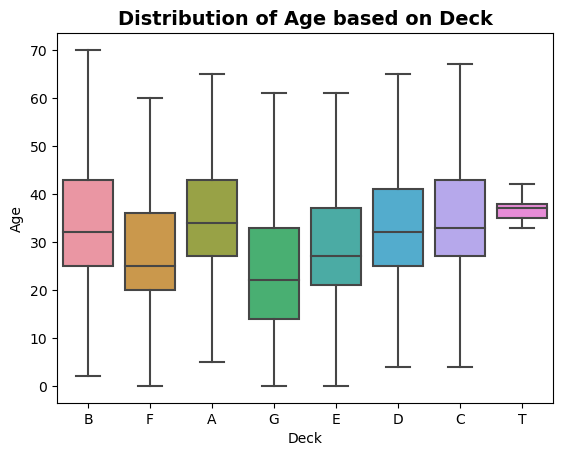

In [74]:
sns.boxplot(data=df_train, x='Deck', y='Age',showfliers=False)
plt.title('Distribution of Age based on Deck', weight='bold', fontsize=14)
plt.show()

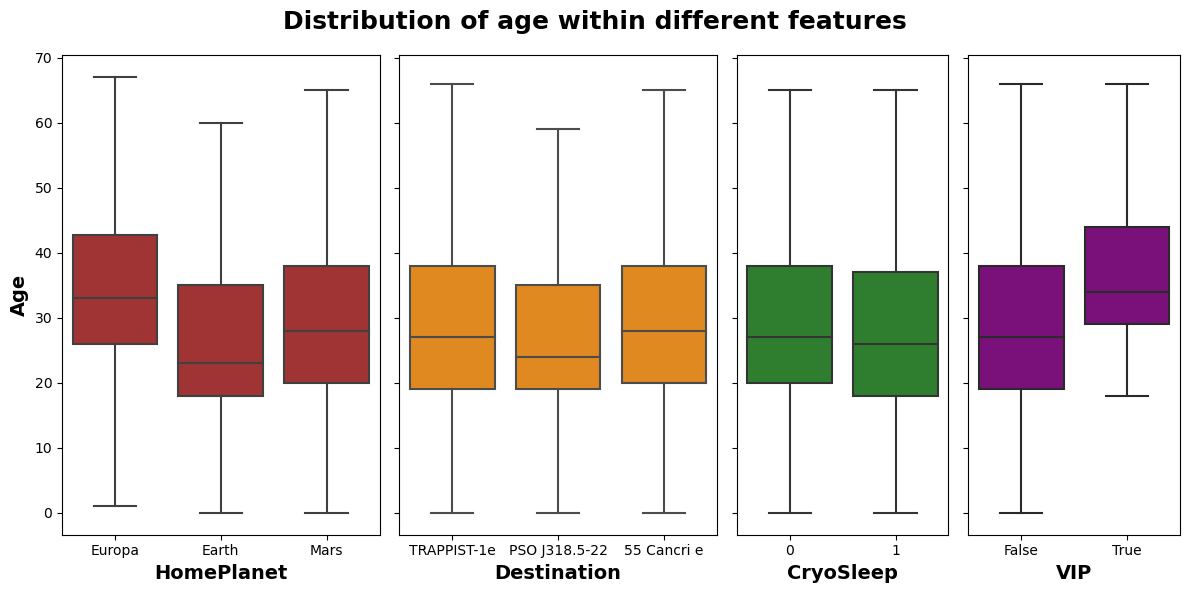

In [75]:
fig, ax = plt.subplots(1,4,figsize=(12,6), sharey=True, gridspec_kw={'width_ratios': [3, 3, 2, 2]})
fig.suptitle('Distribution of age within different features', weight='bold', fontsize=18)

features = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']
colors = ['firebrick', 'darkorange', 'forestgreen', 'darkmagenta']

for idx, feature in enumerate(features):
    sns.boxplot(data=df_train, x=feature, y='Age',showfliers=False, color=colors[idx], ax=ax[idx])
    ax[idx].set_xlabel(feature, weight='bold', fontsize=14)
    ax[idx].set_ylabel(None)    

ax[0].set_ylabel('Age', weight='bold', fontsize=14)
plt.tight_layout()
plt.show()

__As we can see on boxplots value of Age does not change significantly based on CryoSleep or Destination. We can see greater volatility within HomePlanet and especially VIP groups. Also Deck seems to be strong predictor of Age. Let's examine it closely__

In [76]:
df_train.groupby('Deck').agg({'Age':'mean', 'PassengerId':'count'}).sort_values(by='PassengerId', ascending=False)

,Age,PassengerId
Deck,,
F,28.418234,2810
G,24.003953,2588
E,30.023121,885
B,33.679438,796
C,34.928668,761
D,33.407563,487
A,35.094862,262
T,37.000000,5


In [77]:
df_train.groupby('HomePlanet').agg({'Age':'mean', 'PassengerId':'count'}).sort_values(by='PassengerId', ascending=False)

,Age,PassengerId
HomePlanet,,
Earth,26.081087,4725
Europa,34.410329,2178
Mars,29.295298,1787


In [78]:
df_train.groupby('VIP').agg({'Age':'mean', 'PassengerId':'count'}).sort_values(by='PassengerId', ascending=False)

,Age,PassengerId
VIP,,
False,28.639611,8291
True,37.449495,199


__VIP is too imbalanced to draw any conclusions based on it.__

In [79]:
df_train[df_train['Age'].isna()].groupby('HomePlanet')['PassengerId'].count()

HomePlanet
Earth     88
Europa    48
Mars      43
Name: PassengerId, dtype: int64

__Value of Age varies the most depending on HomePlanet and we have balanced representation here, so we can take this feature as basis for assigning missing values. The second option is to perform simple linear regression based on those features__

In [80]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_score

# age_lr = LinearRegression()

# known_age = df_train[~df_train['Age'].isna()]
# missing_age = df_train[df_train['Age'].isna()]

# age_reg_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CoPassengers' ,'Deck', 'Side']

# X = pd.get_dummies(known_age[age_reg_features], drop_first=True)
# y = known_age['Age']

# cross_val_score(age_lr, X, y, cv=10, scoring='r2').mean()

In [81]:
other_feature_imputer_age = ImputeBasedOnOtherFeature(method='mean', base_feature='HomePlanet', filled_feature='Age')
nans_before = df_train['Age'].isna().sum()
df_train = other_feature_imputer_age.fit_transform(df_train)
nans_after = df_train['Age'].isna().sum()

In [82]:
filling_nans = follow_fill('Age based on HomePlanet', filling_nans)
filling_nans

,Step,NaNs in feature,Filled NaNs,% of filled NaNs in feature,NaNs in feature left,Overall rows with NaNs,Filled NaNs as % of dataset,% of rows with NaNs in dataset
0,Start,0,0,0,0,2087,0,24.01%
1,HomePlanet based on co-passengers,201,90,44.78%,111,2010,1.04%,23.12%
2,HomePlanet based on Destination,111,108,97.3%,3,1924,1.24%,22.13%
3,CryoSleep based on co-passengers,217,108,49.77%,109,1838,1.24%,21.14%
4,CryoSleep based on route,109,108,99.08%,1,1755,1.24%,20.19%
5,Cabin based on co-passengers,199,100,50.25%,99,1672,1.15%,19.23%
6,Destination based on co-passengers,182,79,43.41%,103,1607,0.91%,18.49%
7,Destination based on HomePlanet,103,100,97.09%,3,1522,1.15%,17.51%
8,Age based on HomePlanet,179,179,100.0%,0,1367,2.06%,15.73%


__For the purpose of further analysis we will take a closer look on distribution of age and number of representatives of different Age Groups__

__Therefore we will create age bins__

__People will be labeled as:__
- __'infants'__: 0 - 2 years
- __'child'__: 3 - 12 years
- __'teenager'__: 13 - 19
- __'young_adult'__: 20 - 35
- __'middle_age'__: 36 - 60
- __'senior'__: >60

In [83]:
age_bins = [-1,2,12,19,35,60,df_train['Age'].max()]
age_labels = ['infant','child', 'teenager', 'young_adult', 'middle_age', 'senior']

df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=age_bins, labels=age_labels)

In [84]:
df_train['AgeGroup'].value_counts()

young_adult    4022
middle_age     2293
teenager       1352
child           486
infant          320
senior          220
Name: AgeGroup, dtype: int64

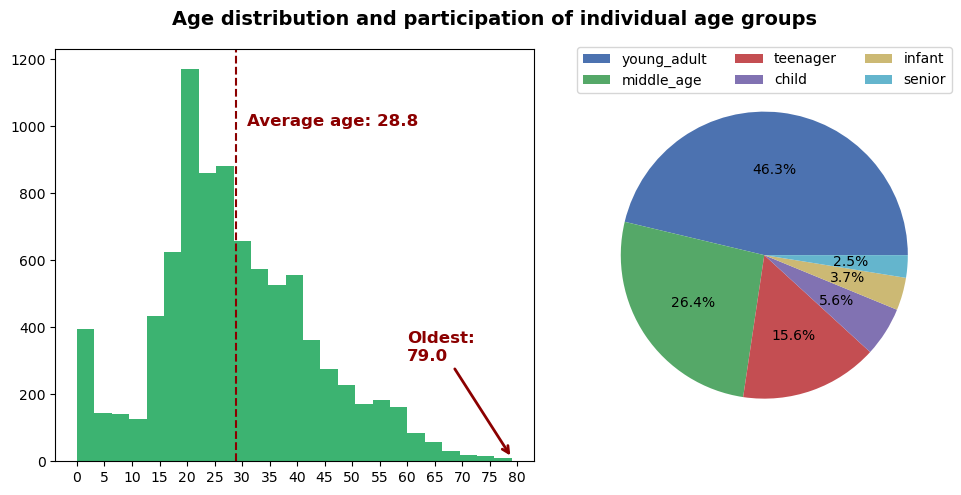

In [85]:
mean_age = df_train['Age'].mean()
max_age = df_train['Age'].max()

fig, ax = plt.subplots(1,2,figsize=(10,5), gridspec_kw={'width_ratios': [4, 3]})
plt.suptitle('Age distribution and participation of individual age groups', weight='bold', fontsize=14)

ax[0].hist(df_train['Age'],bins=25, color='mediumseagreen')
ax[0].set_xticks(range(0,81,5))
ax[0].annotate(f'Oldest:\n{round(max_age,1)}',
             xy=(max_age,10),
             xytext=(60, 300),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='darkred', lw=2),
             color='darkred', weight='bold', fontsize=12
            )

ax[0].axvline(mean_age, linestyle='--', color='darkred')
ax[0].text(mean_age+2, 1000, f'Average age: {round(mean_age,1)}', color='darkred', weight='bold', fontsize=12)

ax[1].pie(df_train['AgeGroup'].value_counts(), autopct='%1.1f%%')
ax[1].legend(labels=df_train['AgeGroup'].value_counts().index, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)

plt.tight_layout()

plt.show()

### VIP

FEATURE: VIP

VALUE COUNTS:

False    8291
True      199

MISSING VALUES:

All missing values: 		203
Traveling in group: 		89
Compatibility within group: 	0.95


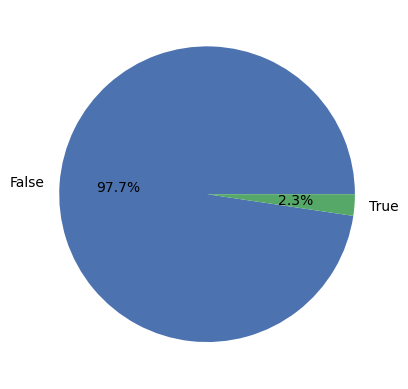

In [86]:
basic_info('VIP')

__Almost 98% of passengers don't have VIP services. It is even higher percentage than compatibility withing groups (~95%) so we can easily fill all missing values with False__

__We won't create custom transformer this time beacuse there is one available in scikit learn__

In [87]:
mode_imputer_vip = SimpleImputer(strategy='most_frequent')
nans_before = df_train['VIP'].isna().sum()
df_train['VIP'] = mode_imputer_vip.fit_transform(df_train['VIP'].values.reshape(-1, 1))
nans_after = df_train['VIP'].isna().sum()

In [88]:
filling_nans = follow_fill('VIP filled with False', filling_nans)
filling_nans

,Step,NaNs in feature,Filled NaNs,% of filled NaNs in feature,NaNs in feature left,Overall rows with NaNs,Filled NaNs as % of dataset,% of rows with NaNs in dataset
0,Start,0,0,0,0,2087,0,24.01%
1,HomePlanet based on co-passengers,201,90,44.78%,111,2010,1.04%,23.12%
2,HomePlanet based on Destination,111,108,97.3%,3,1924,1.24%,22.13%
3,CryoSleep based on co-passengers,217,108,49.77%,109,1838,1.24%,21.14%
4,CryoSleep based on route,109,108,99.08%,1,1755,1.24%,20.19%
5,Cabin based on co-passengers,199,100,50.25%,99,1672,1.15%,19.23%
6,Destination based on co-passengers,182,79,43.41%,103,1607,0.91%,18.49%
7,Destination based on HomePlanet,103,100,97.09%,3,1522,1.15%,17.51%
8,Age based on HomePlanet,179,179,100.0%,0,1367,2.06%,15.73%
9,VIP filled with False,203,203,100.0%,0,1184,2.34%,13.62%


In [89]:
df_train['VIP'] = df_train['VIP'].astype('bool').astype('int')

### Spendings on spaceship

In [90]:
spendings_columns = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

__We will add column of total spendings in purpose of further analysis__

In [91]:
df_train['Spendings'] = df_train[spendings_columns].sum(axis=1)

In [92]:
df_train[spendings_columns].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,224.687617,458.077203,173.729169,311.138778,304.854791
std,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,76.000000,27.000000,59.000000,46.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


__All mising values in Spendings columns will be filled as 0__

In [93]:
# We have to slighlty change the way to calculate nans, because this time we take more than one column into consideration

mode_imputer_spendings = SimpleImputer(strategy='most_frequent')

nans_before = df_train[spendings_columns].isna().sum().sum()

for spending in spendings_columns:
    df_train[spending] = mode_imputer_spendings.fit_transform(df_train[spending].values.reshape(-1, 1))
    
nans_after = df_train[spendings_columns].isna().sum().sum()

In [94]:
filling_nans = follow_fill('Spendings filled with 0', filling_nans)
filling_nans

,Step,NaNs in feature,Filled NaNs,% of filled NaNs in feature,NaNs in feature left,Overall rows with NaNs,Filled NaNs as % of dataset,% of rows with NaNs in dataset
0,Start,0,0,0,0,2087,0,24.01%
1,HomePlanet based on co-passengers,201,90,44.78%,111,2010,1.04%,23.12%
2,HomePlanet based on Destination,111,108,97.3%,3,1924,1.24%,22.13%
3,CryoSleep based on co-passengers,217,108,49.77%,109,1838,1.24%,21.14%
4,CryoSleep based on route,109,108,99.08%,1,1755,1.24%,20.19%
5,Cabin based on co-passengers,199,100,50.25%,99,1672,1.15%,19.23%
6,Destination based on co-passengers,182,79,43.41%,103,1607,0.91%,18.49%
7,Destination based on HomePlanet,103,100,97.09%,3,1522,1.15%,17.51%
8,Age based on HomePlanet,179,179,100.0%,0,1367,2.06%,15.73%
9,VIP filled with False,203,203,100.0%,0,1184,2.34%,13.62%


__Now let's get better insight in purchases made on spaceship__

In [95]:
# preparing variables needed for chart
any_purchase = df_train[df_train['Spendings']>0]

q3 = np.quantile(any_purchase['Spendings'], 0.75)
q1 = np.quantile(any_purchase['Spendings'], 0.25)
iqr = q3 - q1
outliers = q3 + 1.5*iqr

max_spending = int(max(df_train['Spendings']))

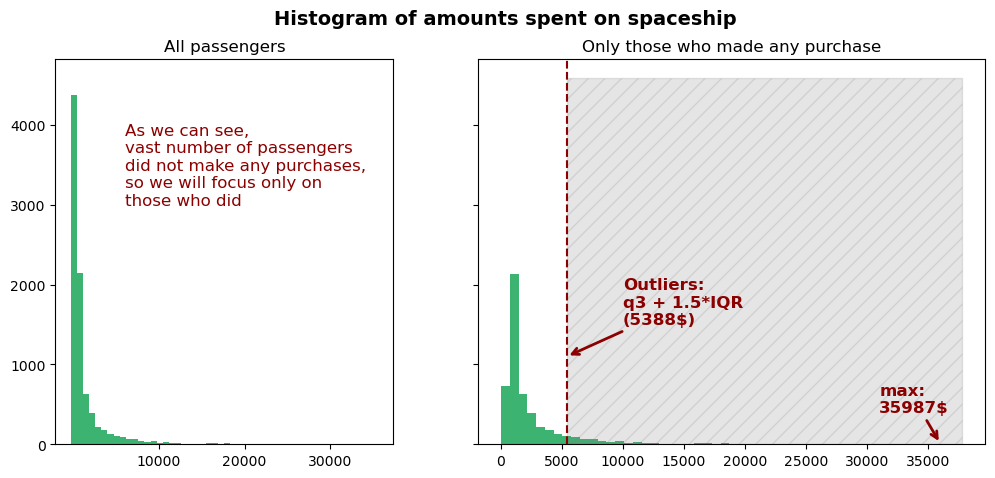

In [96]:
fig,ax = plt.subplots(1,2, figsize=(12,5), sharey=True, gridspec_kw={'width_ratios': [2, 3]})

plt.suptitle('Histogram of amounts spent on spaceship', weight='bold', fontsize=14)

ax[0].hist(df_train['Spendings'], bins=50, align='left', color='mediumseagreen')
ax[0].set_xticks([10000,20000,30000])
ax[0].annotate('As we can see, \nvast number of passengers \ndid not make any purchases, \nso we will focus only on \nthose who did',
             xy=(6000, 3000),
             xycoords='data',
             color='darkred', fontsize=12
            )
ax[0].set_title('All passengers')

# creating very similar chart to ax[0] but using filtered data 'any_purchase' instead of df_train
ax[1].hist(any_purchase['Spendings'], bins=50, color='mediumseagreen')
ax[1].set_title('Only those who made any purchase')
ax[1].axvline(outliers, linestyle='--', color='darkred')
ax[1].fill_between([outliers, ax[1].get_xlim()[1]], 0, ax[1].get_ylim()[1], color='grey', alpha=0.2, hatch='//')
ax[1].annotate(f'Outliers:\nq3 + 1.5*IQR \n({round(outliers)}$)',
             xy=(outliers,1100),
             xytext=(10000, 1500),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='darkred', lw=2),
             color='darkred', weight='bold', fontsize=12
            )
ax[1].annotate(f'max:\n{max_spending}$',
             xy=(max_spending,10),
             xytext=(31000, 400),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='darkred', lw=2),
             color='darkred', weight='bold', fontsize=12
            )
plt.show()

__As we can see above a graphs are strongly right-sided skewed. Lot of people didn't make any purchases and among of those who did we can find many outliers. We can later consider to replace all outlier values with some other, lower value (for example: q3 + 1.5IQR) as it may disrupt models sensitive for outliers__

__But first, let's take a closer look on individual spendings categories__ 

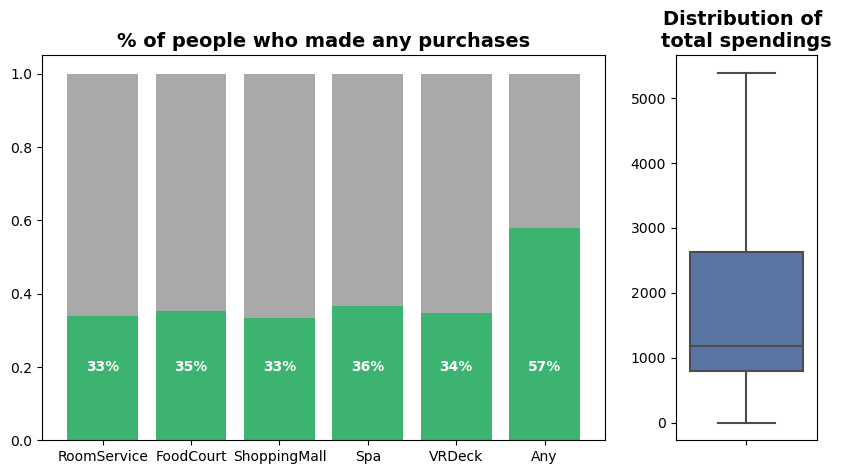

In [97]:
fig, ax = plt.subplots(1,2, figsize=(10,5), gridspec_kw={'width_ratios': [8, 2]})

# creating two charts. Second one will be simple boxplot of total spendings (but excluding people who did not make any purchases)
# The first chart is more complicated because we need to use different data for every stacked bar. 
# Every category operates only on rows where more than zero was spent in this particular category. 
# That's why we have to create this chart in loop
# The last bar is outside the loop beacuse it contains all spendings columns

for spending in spendings_columns:
    any_purchase_pct = df_train[df_train[spending]>0].shape[0]/df_train.shape[0]
    ax[0].bar(x=spending, height=any_purchase_pct, color='mediumseagreen')
    ax[0].bar(x=spending, height=1-any_purchase_pct, bottom=any_purchase_pct, color='darkgrey')
    ax[0].text(spending, 0.2, f'{int(any_purchase_pct * 100)}%', ha='center', va='center', color='white', weight='bold')

any_purchase_pct = any_purchase.shape[0]/df_train.shape[0]
ax[0].bar(x='Any', height=any_purchase_pct, color='mediumseagreen')
ax[0].bar(x='Any', height=1-any_purchase_pct, bottom=any_purchase_pct, color='darkgrey')
ax[0].text('Any', 0.2, f'{int(any_purchase_pct * 100)}%', ha='center', va='center', color='white', weight='bold')
ax[0].set_title('% of people who made any purchases', fontsize=14, weight='bold')

sns.boxplot(data=any_purchase, y='Spendings', showfliers=False, ax=ax[1])
ax[1].set_title('Distribution of \ntotal spendings', fontsize=14, weight='bold')
ax[1].set_ylabel(None)


plt.show()

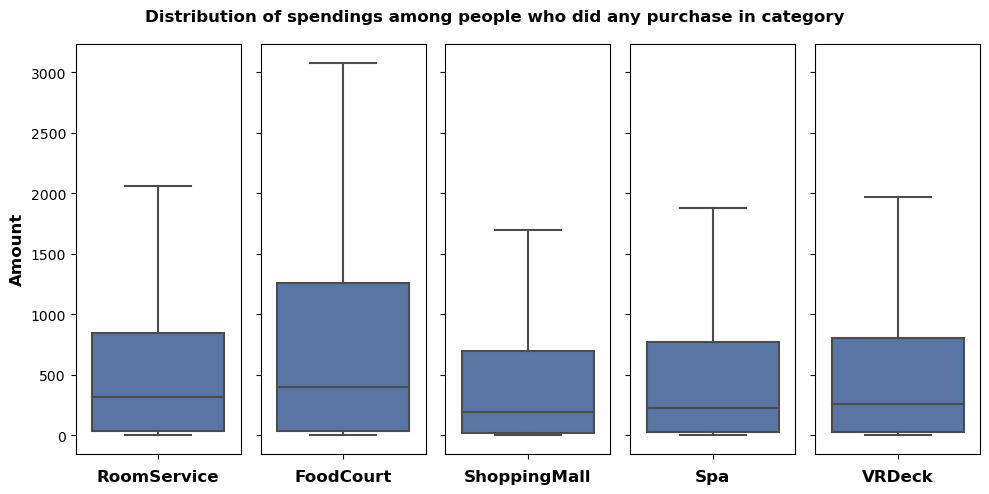

In [98]:
# This time we create five different plots. In order to assign them to axes we have to use enumerated loop. 
# Besides that, the idea is similar as above

fig, ax = plt.subplots(1,5,figsize=(10,5), sharey=True)
fig.suptitle('Distribution of spendings among people who did any purchase in category', weight='bold', fontsize=12)
for idx, spending in enumerate(spendings_columns):
    sns.boxplot(data=df_train[df_train[spending]>0], y=spending, showfliers=False, ax=ax[idx])
    ax[idx].set_xlabel(spending, weight='bold', fontsize=12)
    ax[idx].set_ylabel(None)
ax[0].set_ylabel('Amount', weight='bold', fontsize=12)
plt.tight_layout()
plt.show()

__We can also make bins based on spending amounts in total and in particular categories__

__We'll define proper function__

__People will be labeled as:__
- __'no'__: those who didn't make any purchases
- __'low'__: those who spent less than 75% passengers (quartiles are calculated only among people who made any purchase)
- __'average'__: those who are between q1 and q3
- __'high'__: those who spent more than 75% passengers
- __'very_high'__: those who are considered outliers (spent above 1.5 times more than q3)

In [99]:
# beacuse it will be necessary to perform binning on every column we will prepare simple function

def binning_spendings (spending_column):
    
    any_spendings = df_train[df_train[spending_column]>0][spending_column]
    
    q1 = np.quantile(any_spendings, 0.25)
    q3 = np.quantile(any_spendings, 0.75)
    iqr = q3 - q1
    outlier = q3 + 1.5*iqr
    maximum = any_spendings.max()

    spending_bins = [-1,0,q1,q3,outlier,maximum]
    spending_labels = ['nothing', 'low', 'average', 'high', 'very_high']
    
    return pd.cut(df_train[spending_column], bins=spending_bins, labels=spending_labels)

In [100]:
df_train['SpendingsGroups'] = binning_spendings('Spendings')
df_train['RoomServiceGroups'] = binning_spendings('RoomService')
df_train['FoodCourtGroups'] = binning_spendings('FoodCourt')
df_train['ShoppingMallGroups'] = binning_spendings('ShoppingMall')
df_train['SpaGroups'] = binning_spendings('Spa')
df_train['VRDeckGroups'] = binning_spendings('VRDeck')

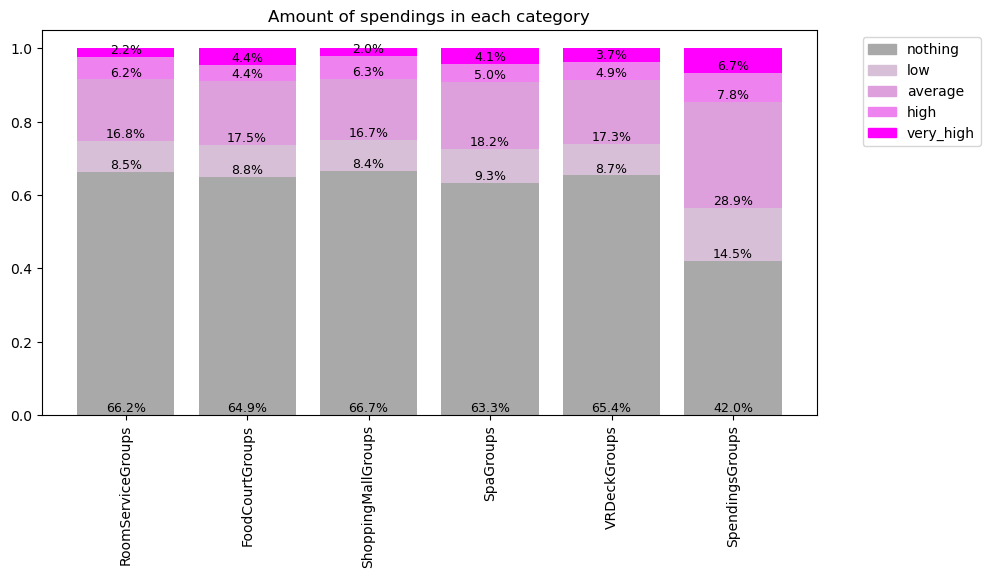

In [101]:
groups_columns = ['RoomServiceGroups' ,'FoodCourtGroups', 'ShoppingMallGroups', 'SpaGroups', 'VRDeckGroups', 'SpendingsGroups']
spending_labels = ['nothing', 'low', 'average', 'high', 'very_high']

color_map = {
    'nothing': 'darkgrey',
    'low': 'thistle',
    'average': 'plum',
    'high': 'violet',
    'very_high': 'magenta'
}

plt.figure(figsize=(10,5))
plt.title('Amount of spendings in each category')

bottom_value = 0

# similarly as earlier we will create stacked bar chart for different columns but this time we will also iterate through
# labels in order to put it one above the other. First we will asign param bottom to zero and later at the end of every 
# iteration will will assign there current label

for group in groups_columns:
    
    group_dist = df_train[group].value_counts(normalize=True)
    
    for label in spending_labels:
        plt.bar(x=group, height=group_dist[label], bottom=bottom_value, label=label, color=color_map[label])
        text = f'{round(100*group_dist[label],1)}%'
        plt.text(group, bottom_value, text, ha='center', va='bottom', color='black', fontsize=9)
        bottom_value += group_dist[label]
        
    bottom_value = 0
    
plt.xticks(rotation=90)
handles = [plt.Rectangle((0,0),1,1, color=color_map[label]) for label in spending_labels]
plt.legend(handles, spending_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Deleting Name column

In [102]:
nans_before = df_train['Name'].isna().sum()

df_train.drop(columns=['Name'], inplace=True)

nans_after = 0

In [103]:
filling_nans = follow_fill('Deleting Name column', filling_nans)
filling_nans

,Step,NaNs in feature,Filled NaNs,% of filled NaNs in feature,NaNs in feature left,Overall rows with NaNs,Filled NaNs as % of dataset,% of rows with NaNs in dataset
0,Start,0,0,0,0,2087,0,24.01%
1,HomePlanet based on co-passengers,201,90,44.78%,111,2010,1.04%,23.12%
2,HomePlanet based on Destination,111,108,97.3%,3,1924,1.24%,22.13%
3,CryoSleep based on co-passengers,217,108,49.77%,109,1838,1.24%,21.14%
4,CryoSleep based on route,109,108,99.08%,1,1755,1.24%,20.19%
5,Cabin based on co-passengers,199,100,50.25%,99,1672,1.15%,19.23%
6,Destination based on co-passengers,182,79,43.41%,103,1607,0.91%,18.49%
7,Destination based on HomePlanet,103,100,97.09%,3,1522,1.15%,17.51%
8,Age based on HomePlanet,179,179,100.0%,0,1367,2.06%,15.73%
9,VIP filled with False,203,203,100.0%,0,1184,2.34%,13.62%


__As we finished inspecting features and filling missing values based on several criterias, let's take a look back at this process__

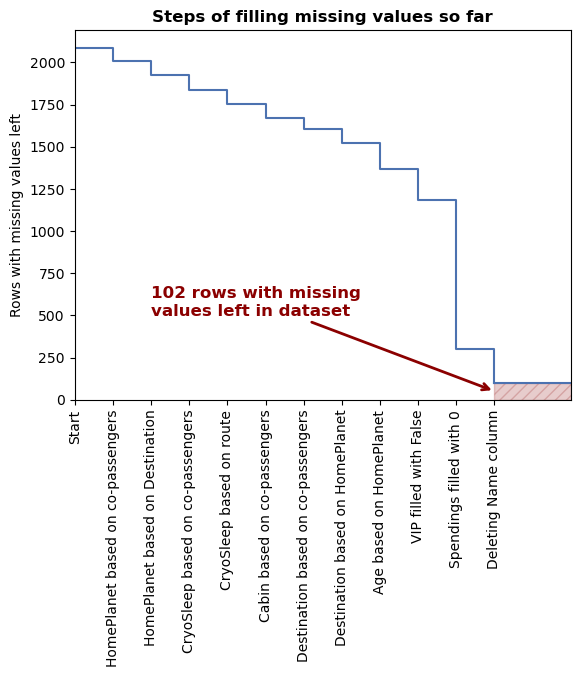

In [104]:
nans_left = filling_nans.iloc[-1,5]

plt.step(filling_nans['Step'], filling_nans['Overall rows with NaNs'], where='post')
plt.title('Steps of filling missing values so far', weight='bold')
plt.ylabel('Rows with missing values left')
plt.xticks(rotation=90)

last_idx = filling_nans.index.stop-1

plt.axhline(filling_nans.loc[last_idx,'Overall rows with NaNs'], xmin=last_idx/(last_idx+2))
plt.fill_between([last_idx, last_idx+2], 0, nans_left, color='darkred', alpha=0.2, hatch='///')
plt.ylim(0,)
plt.xlim(0,last_idx+2)
plt.annotate(f'{nans_left} rows with missing \nvalues left in dataset',
             xy=(last_idx,nans_left/2),
             xytext=(2, 500),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='darkred', lw=2),
             color='darkred', weight='bold', fontsize=12
            )
plt.show()

In [105]:
last_idx = filling_nans.index.stop-1

print('DATA CLEANSING SUMMARY:\n')
print('AT START:')
print(f'Rows with missing values at start: \t\t{filling_nans.iloc[0,5]}')
print(f'% of rows with NaNs in dataset at start: \t{filling_nans.iloc[0,7]}')
print('-------------------------------------------------------')
print('NOW:')
print(f'Rows with missing values now: \t\t\t{filling_nans.iloc[last_idx,5]}')
print(f'% of rows with NaNs in dataset now: \t\t{filling_nans.iloc[last_idx,7]}')

DATA CLEANSING SUMMARY:

AT START:
Rows with missing values at start: 		2087
% of rows with NaNs in dataset at start: 	24.01%
-------------------------------------------------------
NOW:
Rows with missing values now: 			102
% of rows with NaNs in dataset now: 		1.17%


__We managed to reasonably fill almost 2000 rows that contained missing values, going down from 24% of dataset to 1%__

In [106]:
df_train.isna().sum()

PassengerId            0
HomePlanet             3
CryoSleep              0
Destination            3
Age                    0
VIP                    0
RoomService            0
FoodCourt              0
ShoppingMall           0
Spa                    0
VRDeck                 0
Transported            0
GroupID                0
CoPassengers           0
Route                  3
Deck                  99
Side                  99
AgeGroup               0
Spendings              0
SpendingsGroups        0
RoomServiceGroups      0
FoodCourtGroups        0
ShoppingMallGroups     0
SpaGroups              0
VRDeckGroups           0
dtype: int64

In [107]:
df_train[df_train['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupID,CoPassengers,Route,Deck,Side,AgeGroup,Spendings,SpendingsGroups,RoomServiceGroups,FoodCourtGroups,ShoppingMallGroups,SpaGroups,VRDeckGroups
347,0382_01,NaN,0,NaN,23.0,0,348.0,0.0,0.0,4.0,368.0,False,0382,0,NaN,G,P,young_adult,720.0,low,average,nothing,nothing,low,average
5208,5555_01,NaN,0,NaN,43.0,0,1.0,0.0,213.0,7.0,701.0,True,5555,0,NaN,G,S,middle_age,922.0,average,low,nothing,average,low,average
5687,6031_01,NaN,0,NaN,52.0,0,0.0,645.0,0.0,0.0,395.0,True,6031,0,NaN,F,S,middle_age,1040.0,average,nothing,average,nothing,nothing,average


__As we have quite big amount of missing values left in Deck and Side categories, we will take a closer look at possible dependencies with other features__

In [108]:
df_train['Deck'].value_counts()

F    2810
G    2588
E     885
B     796
C     761
D     487
A     262
T       5
Name: Deck, dtype: int64

In [109]:
# we will find number of passengers in each Deck who did sleep and those who didn't and then divide it by
# number of total passenger who did and didn't sleep. Later we will do the same with othe features

crosstab = pd.crosstab(df_train['Deck'], df_train['CryoSleep'], values=df_train['PassengerId'], aggfunc='count')
crosstab_normalized = round(crosstab.div(crosstab.sum(axis=0), axis=1),2)
crosstab_normalized

CryoSleep,0,1
Deck,,
A,0.03,0.02
B,0.07,0.14
C,0.08,0.10
D,0.07,0.04
E,0.13,0.06
F,0.40,0.19
G,0.22,0.45
T,0.00,NaN


In [110]:
crosstab = pd.crosstab(df_train['Deck'], df_train['Destination'], values=df_train['PassengerId'], aggfunc='count')
crosstab_normalized = round(crosstab.div(crosstab.sum(axis=0), axis=1),2)
crosstab_normalized

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Deck,,,
A,0.06,0.00,0.02
B,0.19,0.00,0.07
C,0.18,0.02,0.07
D,0.06,0.02,0.06
E,0.07,0.05,0.12
F,0.22,0.31,0.36
G,0.21,0.59,0.29
T,NaN,NaN,0.00


In [111]:
crosstab = pd.crosstab(df_train['Deck'], df_train['HomePlanet'], values=df_train['PassengerId'], aggfunc='count')
crosstab_normalized = round(crosstab.div(crosstab.sum(axis=0), axis=1),2)
crosstab_normalized

HomePlanet,Earth,Europa,Mars
Deck,,,
A,NaN,0.12,NaN
B,NaN,0.37,NaN
C,0.00,0.35,NaN
D,0.00,0.09,0.16
E,0.09,0.06,0.19
F,0.36,0.00,0.64
G,0.55,0.00,NaN
T,0.00,0.00,NaN


__We can see clear correlation between HomePlanet and Deck. People from Earth travel only in Decks E,F,G, from Mars in D,E,F. People from  Europa travel in five different Decks. We will use those informations to fill Deck with mode based on Home Planet.__

In [112]:
other_feature_imputer_deck = ImputeBasedOnOtherFeature(method='mode', base_feature='HomePlanet', filled_feature='Deck')
nans_before = df_train['Deck'].isna().sum()
df_train = other_feature_imputer_deck.fit_transform(df_train)
nans_after = df_train['Deck'].isna().sum()

__We can also used aquired knowledge to fill remaining missing values of HomePlanet based on Decks: G->Earth, F->Mars (which are modes for these decks). Destination will be filled with mode for all HomePlanets -> TRAPPIST-1e__

In [113]:
other_feature_imputer_hp2 = ImputeBasedOnOtherFeature(method='mode', base_feature='Deck', filled_feature='HomePlanet')
other_feature_imputer_dest2 = ImputeBasedOnOtherFeature(method='mode', base_feature='Deck', filled_feature='Destination')
mode_imputer_dest = SimpleImputer(strategy='most_frequent')

df_train = other_feature_imputer_hp2.fit_transform(df_train)
df_train = other_feature_imputer_dest2.fit_transform(df_train)
df_train['Destination'] = mode_imputer_dest.fit_transform(df_train['Destination'].values.reshape(-1, 1))
df_train['Route'] = df_train["HomePlanet"] +' -> ' + df_train["Destination"]

In [114]:
df_train.isna().sum()

PassengerId            0
HomePlanet             0
CryoSleep              0
Destination            0
Age                    0
VIP                    0
RoomService            0
FoodCourt              0
ShoppingMall           0
Spa                    0
VRDeck                 0
Transported            0
GroupID                0
CoPassengers           0
Route                  0
Deck                   0
Side                  99
AgeGroup               0
Spendings              0
SpendingsGroups        0
RoomServiceGroups      0
FoodCourtGroups        0
ShoppingMallGroups     0
SpaGroups              0
VRDeckGroups           0
dtype: int64

__As we don't have any sensible hints on which we can fill Side and it's very balanced feature we will fill it randomly with probabilities.__

__We will create transformer similar as before but now it won't rely on other feature just look for distribution (probability) of filled feature__

In [115]:
class ImputeBasedOnDistribution(BaseEstimator, TransformerMixin):
    
    def __init__(self, feature):
        self.feature = feature

    def fill_empty(self, value, fill_values, fill_probabilities):
        if pd.isnull(value):
            return np.random.choice(fill_values, p=fill_probabilities)
        else:
            return value        

    def fit(self, X, y=None):
        self.fill_values = X[self.feature].value_counts(normalize=True).index.tolist()
        self.fill_probabilities = X[self.feature].value_counts(normalize=True).tolist()
        return self
    
    def transform(self, X, y=None):
        for value, probability in zip(self.fill_values, self.fill_probabilities):

            X.loc[X[X[self.feature].isna()].index, self.feature] = X[X[self.feature].isna()][self.feature].apply(self.fill_empty, args=(self.fill_values, self.fill_probabilities))

        return X

In [116]:
distribution_imputer = ImputeBasedOnDistribution(feature='Side')
df_train = distribution_imputer.fit_transform(df_train)

In [117]:
df_train.isna().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
Destination           0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Transported           0
GroupID               0
CoPassengers          0
Route                 0
Deck                  0
Side                  0
AgeGroup              0
Spendings             0
SpendingsGroups       0
RoomServiceGroups     0
FoodCourtGroups       0
ShoppingMallGroups    0
SpaGroups             0
VRDeckGroups          0
dtype: int64

### Transported

In [118]:
df_train['Transported'] = df_train['Transported'].astype(bool).astype(int)

## Relationship between features and target variable

__At this point we will take a closer look at target variable depending on feature values__

__This may give us a hint which features are significant for modeling stage__

__First, let's take a look at distribution of target variable throughout whole training dataset, to have a reference point for further comparisons__

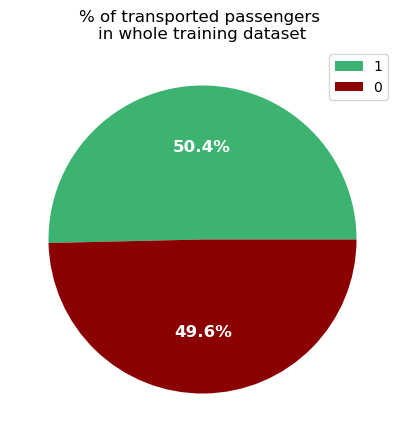

In [119]:
transported = df_train['Transported'].value_counts()
transported_pct = df_train['Transported'].mean()

plt.figure(figsize=(5,5))
plt.pie(transported, 
        colors=['mediumseagreen', 'darkred'], 
        autopct='%1.1f%%', textprops={'fontsize':12, 'color':'white', 'weight':'bold'}
       )
plt.title('% of transported passengers \nin whole training dataset')
plt.legend(labels=transported.index)
plt.show()

__As we can see passengers who were transported to another dimension and those who weren't are divided almost equally__

### Numeric features

__We have some numeric features in dataset. We can check correlation beetween them and target variable first__

In [120]:
# we will create df with correlations between numeric features and Transported, add absolute value of correlation 
# to put features on chart in order of influence 

numeric_corr = df_train[['VIP', 'CryoSleep', 'Spendings', 'RoomService', 'FoodCourt', 
                         'ShoppingMall', 'Spa', 'VRDeck', 'Age', 'CoPassengers']]\
                        .corrwith(df_train['Transported']).to_frame().reset_index()\
                        .rename(columns={'index':'Feature', 0:'Corr'})

numeric_corr['Abs_corr'] = np.abs(numeric_corr['Corr'])

numeric_corr.sort_values(by='Abs_corr', ascending=False, inplace=True)

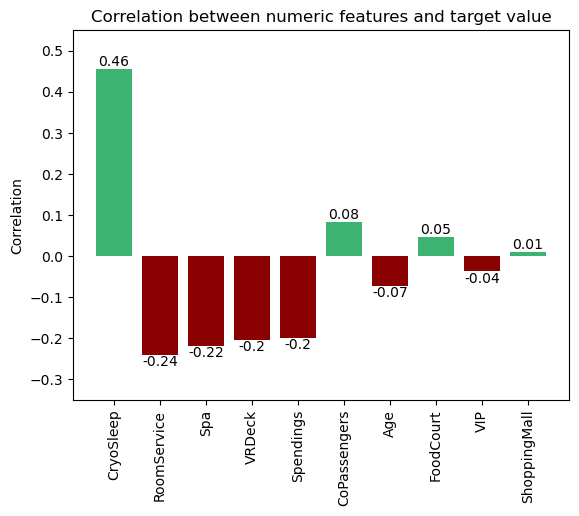

In [121]:
colors = ['mediumseagreen' if corr>0 else 'darkred' for corr in numeric_corr['Corr']]
bar=plt.bar(data=numeric_corr, x='Feature', height='Corr', color=colors)
plt.bar_label(bar, labels=round(numeric_corr['Corr'], 2))
plt.xticks(rotation=90)
plt.ylim(-0.35,0.55)
plt.ylabel('Correlation')
plt.title('Correlation between numeric features and target value')
plt.show()

__We can see strong positive correlation beetween being transported and CryoSleep. It means that passengers who slept during travel were significantly more exposed on being transported to another dimension__

__We can also see that passengers who spent more in three categories (RoomService, Spa and VRDeck) were transported less often than others.__ 

__Number of CoPassengers and Age seem to be slightly correlated with target variable.__

__Amount of spendings in other categories and VIP status weren't that much correlated with target variable.__

### Categorical features

__We will define function to groupby features and count % of transported passengers__

__After that we will check how far apart they are from baseline (which is 50.4%) based on different features__

In [122]:
def grouping (col_to_group):
    
# creating two groupby, one counting % of transported and other counting group size, for every categorical variable
# we will also create column with feature name in order to concatenate dfs and distinguish variables at later stage 

    grouped = pd.merge(
                       df_train.groupby(col_to_group)['Transported'].mean(),
                       df_train.groupby(col_to_group)['Transported'].count(),
                       on=col_to_group)\
                       .sort_values('Transported_x', ascending=False).reset_index()\
                       .rename(columns={col_to_group: 'Variable', 'Transported_x':'%_Transported', 'Transported_y':'Group_Size'}
                      )
    grouped['Feature'] = col_to_group
    grouped = grouped[['Feature', 'Variable', '%_Transported', 'Group_Size']]
    
    return grouped

In [123]:
grouping ('HomePlanet')

,Feature,Variable,%_Transported,Group_Size
0,HomePlanet,Europa,0.660239,2178
1,HomePlanet,Mars,0.523223,1787
2,HomePlanet,Earth,0.424069,4728


__We will show the results on bar plot and compare them to baseline. The smaller group size is the more random the results might be. To immediately see clearly if group isn't too small we will adjust bar width to group size__

In [124]:
def ploting_grouped(grouped):

# this function will plot data created above. Depending on feature we will have diffrent number of bars. Because of that 
# width of figure size will be adjusted to number of bars
    
    plot_size = 1.5 * grouped.shape[0]
    plt.figure(figsize=(plot_size,5))
    feature = grouped.iloc[:,1]
    pct = grouped.iloc[:,2]
    size = grouped.iloc[:,3]

    plt.bar(feature, 
            pct, 
            width=size/size.max(),
            color='mediumseagreen')

    for x, y in zip(feature, pct):
        plt.text(x, 0.3, f'{round(100*y,1)}%', ha='center', va='bottom', weight='bold', color='darkred', fontsize=9)

    plt.axhline(transported_pct, linestyle='--', color='darkred')
    plt.xticks(rotation=90)
    plt.text(plt.gca().get_xlim()[1], transported_pct+0.01, f'Baseline: {round(100*transported_pct,1)}%', weight='bold', color='darkred', ha='right')
    plt.title(f'% of transported passengers \nbased on {grouped.columns[0]}')
    plt.show()

#### HomePlanet

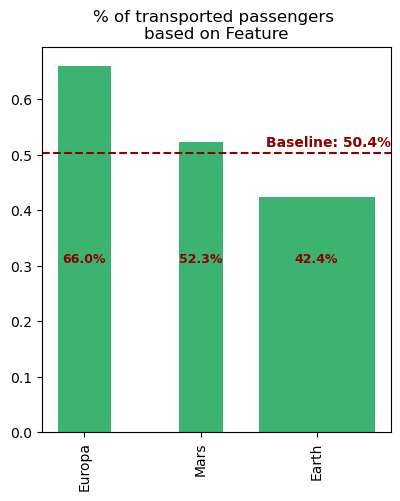

In [125]:
ploting_grouped(grouping ('HomePlanet'))

__Passengers starting from Europa had significantly greater chance to be transported while those from Earth had less chance__

#### Destination

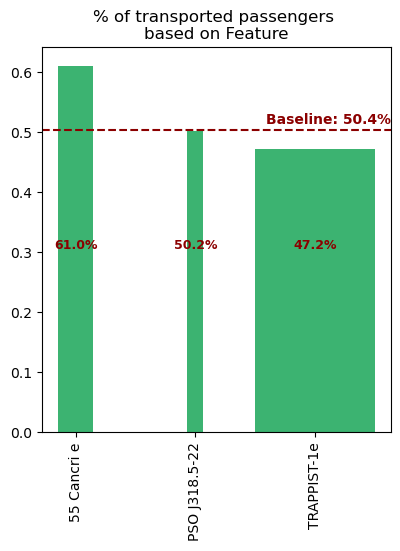

In [126]:
ploting_grouped(grouping ('Destination'))

__Similarly to HomePlanet, passneger traveling to 55 Cancri e had bigger while traveling to TRAPPIST-1e smaller chance to be transported but this differences aren't that clear as it was for HomePlanet__

#### Route

__Let's check then if there are some combinations of HomePlanet -> Destination which show above-average differences from baseline__

In [127]:
# first we have to create new feature

df_train['Route'] = df_train["HomePlanet"] +' -> ' + df_train["Destination"]

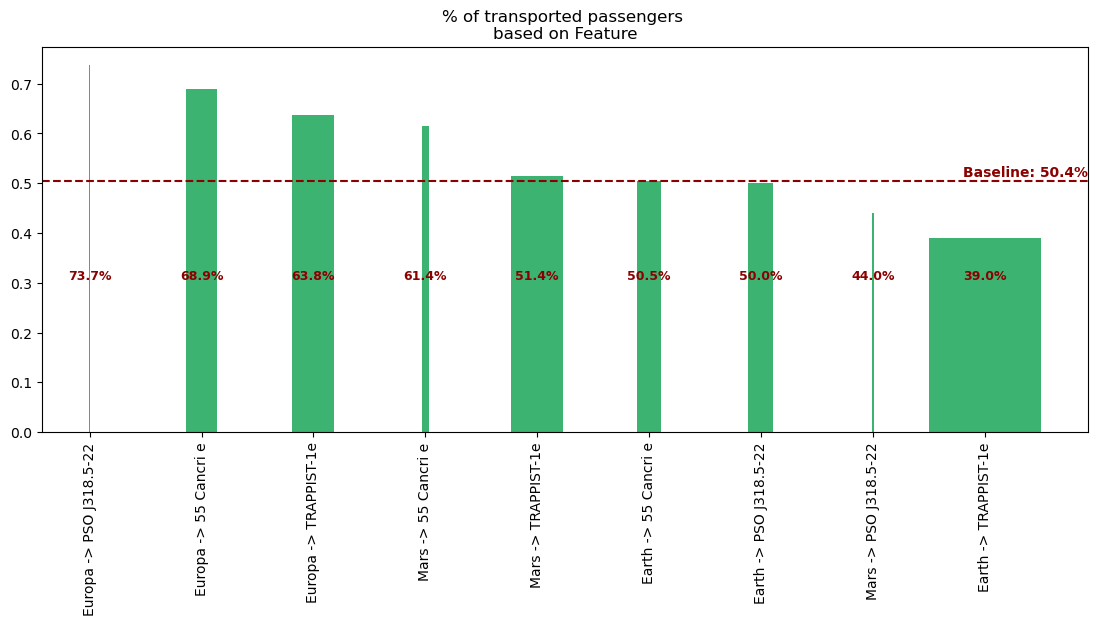

In [128]:
ploting_grouped(grouping('Route'))

__Among routes traveled by significant number of passengers we can see that there are especially three that show deviations from baseline:__
- Europa -> 55 Cancri e (positive correlation)
- Europa -> TRAPPIST-1e (positive correlation)
- Earth -> TRAPPIST-1e	(negative correlation) - most crowded routes of all

#### CoPassengers

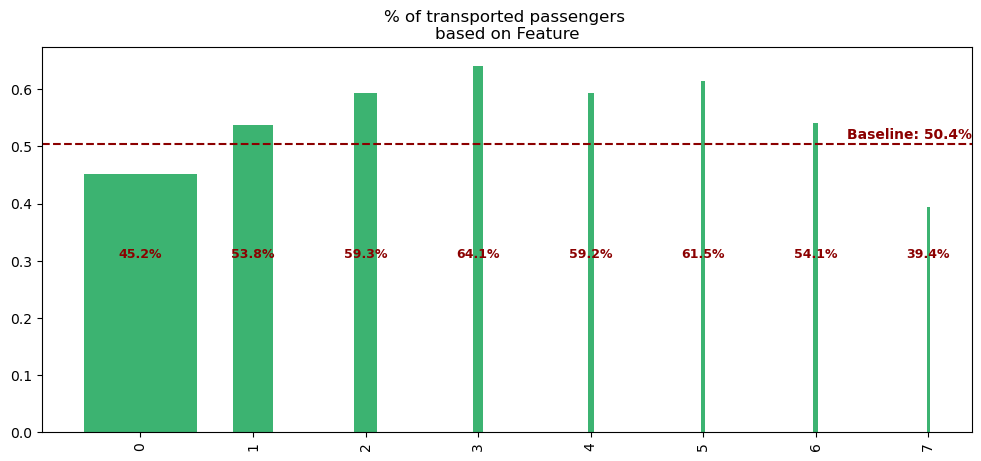

In [129]:
ploting_grouped(grouping ('CoPassengers'))

__Generally we can say that passengers traveling alone had smaller chance of being transported than those who traveled in groups. Differences among groups based on their size aren't very clear (groups size are also not big). We can consider combining all groups and differentiate passengers only if they travel alone or in group.__ 

In [130]:
df_train['Alone'] = df_train['CoPassengers'].apply(lambda x: x==0).astype('int')

__We will also add the same column to test set if we decide to use it in final evaluation.__

In [131]:
# df_test['Alone'] = df_test['CoPassengers'].apply(lambda x: x==0).astype('int')

#### VIP

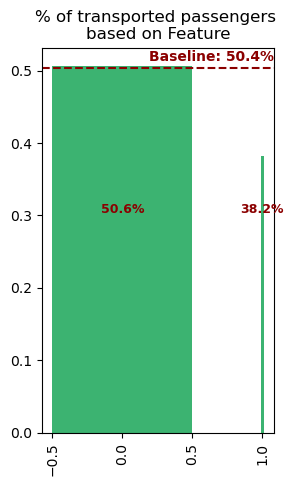

In [132]:
ploting_grouped(grouping ('VIP'))

In [133]:
# from scipy.stats import ttest_ind

# group1 = df_train[df_train['VIP'] == 1]['Transported']
# group2 = df_train[df_train['VIP'] == 0]['Transported']

# t_statistic, p_value = ttest_ind(group1, group2)

# print(p_value)

# if p_value < 0.05:
#     print("Różnice są istotne statystycznie.")
# else:
#     print("Brak istotnych statystycznie różnic.")

__We can confirm, what was seen analyzing correlations with numeric features - VIP status has modest influence on being transported__

#### CryoSleep

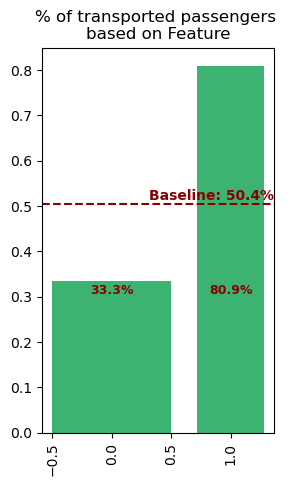

In [134]:
ploting_grouped(grouping ('CryoSleep'))

__By now, CryoSleep seems to be, by far, the strongest predictor if someone was transported or not.__

#### Deck

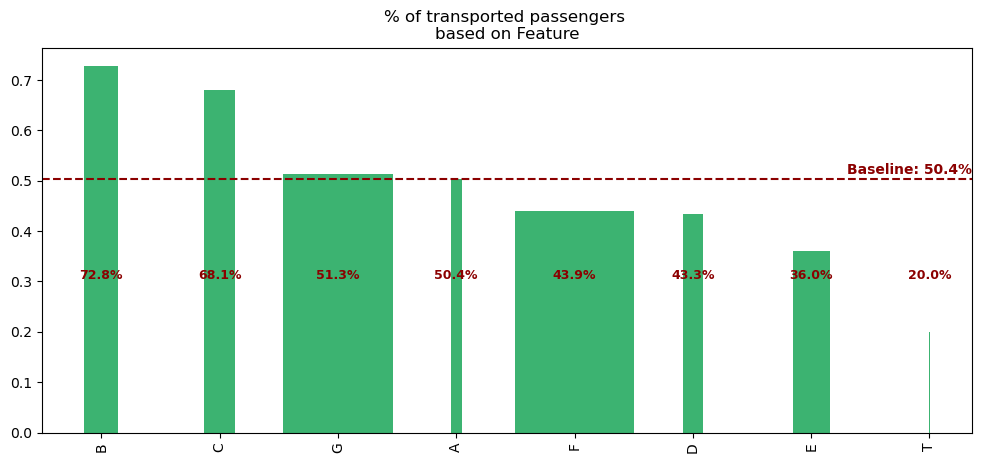

In [135]:
ploting_grouped(grouping ('Deck'))

__Except two (G, A) deck seems to lag behind baseline in both directions__

#### Side

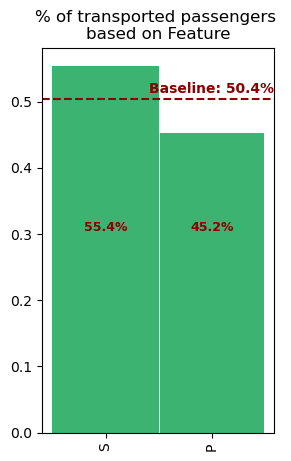

In [136]:
ploting_grouped(grouping ('Side'))

__Side has effect on being transported or not__

#### Age Groups

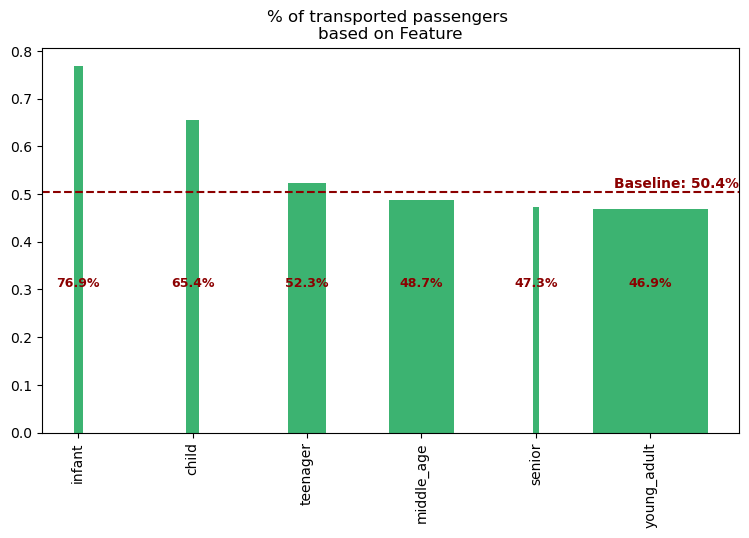

In [137]:
ploting_grouped(grouping ('AgeGroup'))

__As we can see there is much bigger probability to be transported for children. It is clear for 'infant' and 'child' group and this effect disapeara somewhere in teenager group. In older group there is no effect shown. If we would like to create model not on numeric but binned values, we should probably make a further analysis to find for what age effect on being transported disappears. Then group all 'non-influential' groups  into one bin and consider, based on power of effect, if and how many separated bins should be created.__

#### Spendings

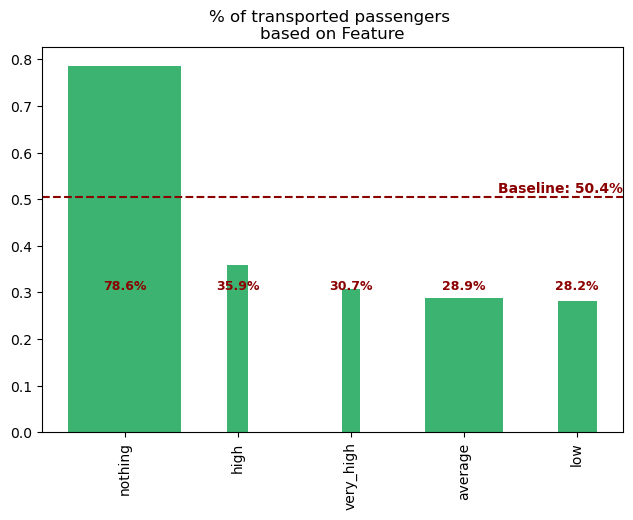

In [138]:
ploting_grouped(grouping ('SpendingsGroups'))

__When we analyze cumulated spendings we can see huge difference between those who spent anything on spaceship and those who didn't and not that much influence based on amount of spendings. However we have to remember that we noticed significant difference in correlation with target variable within particular spending categories. That's why we should analyze them separately.__

##### 'Influential' spendings

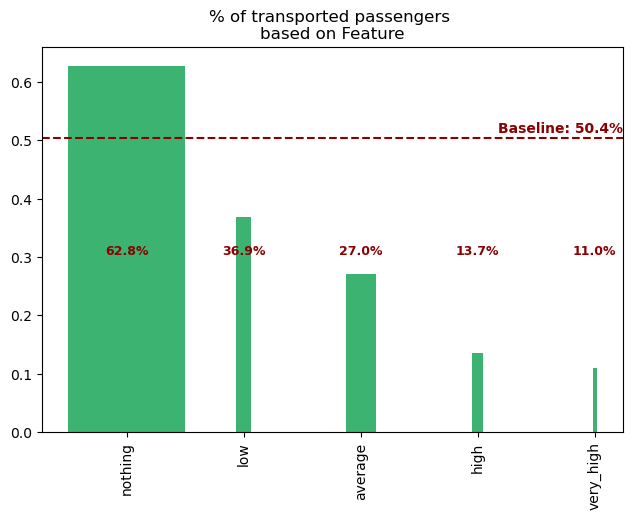

In [139]:
ploting_grouped(grouping ('RoomServiceGroups'))

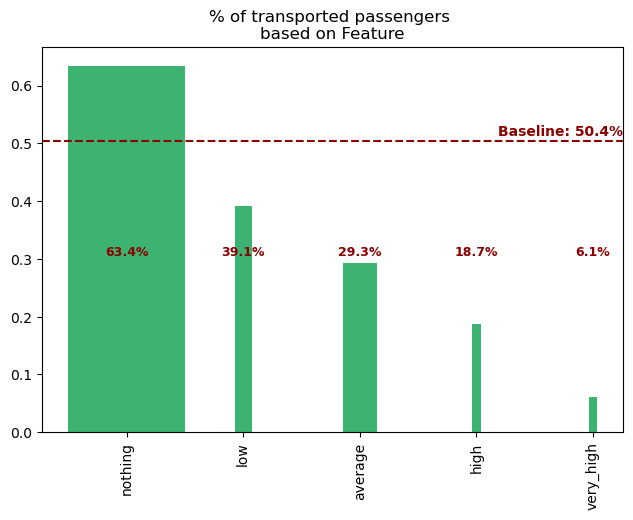

In [140]:
ploting_grouped(grouping ('SpaGroups'))

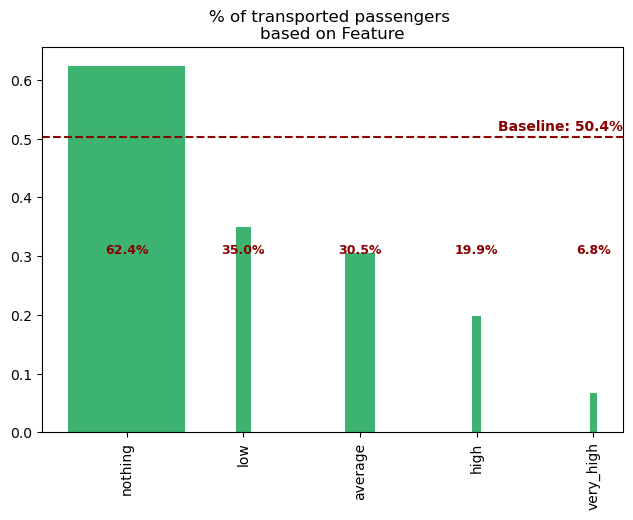

In [141]:
ploting_grouped(grouping ('VRDeckGroups'))

__As seen above, 'influential' spendings seem to act very similar - they have very close percentage of transported passengers who didn't spend anything and then this percentage decreases constantly as amount of spendings increases.__

##### 'Non-influential' spendings

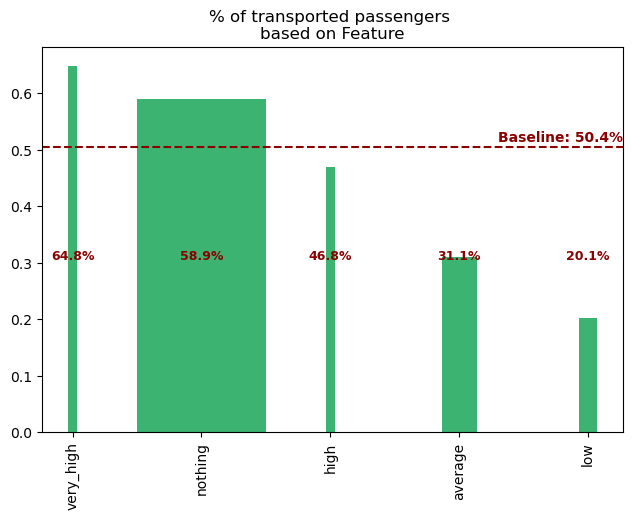

In [142]:
ploting_grouped(grouping('FoodCourtGroups'))

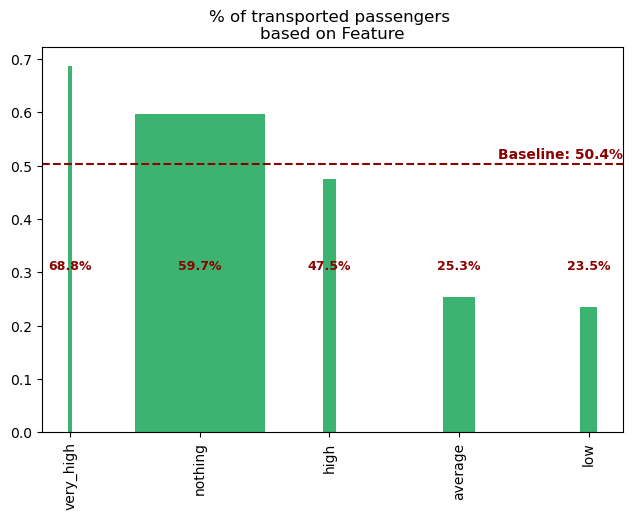

In [143]:
ploting_grouped(grouping ('ShoppingMallGroups'))

__Again, two 'non-influential' spending groups tend to act very similar to each other but differently than 'influential'. Passengers who spent 'very high' amounts are even more likely to be transported than those who didn't spend anything. Also passengers who spent 'high' are more susceptible to be transported.__

__After analysis using binned values we can argue that name 'non-influential' is unfortunate because these features seem to show influence (or relationship) on target variable, but it is non-linear. That's why Pearson correlation coefficient showed us value close to zero.__

__Because 'influential' and 'non-influential' spending categories show much similarities within groups but differ between groups we can consider grouping them into two categories instead of five as we have now.__

__Second thing worth considering is logarithmizing these values as they are all strongly skewed.__

__By now we will create additional columns instead of replacing spending columns, so we can later compare models trained on unchanged vs logarithmized columns__

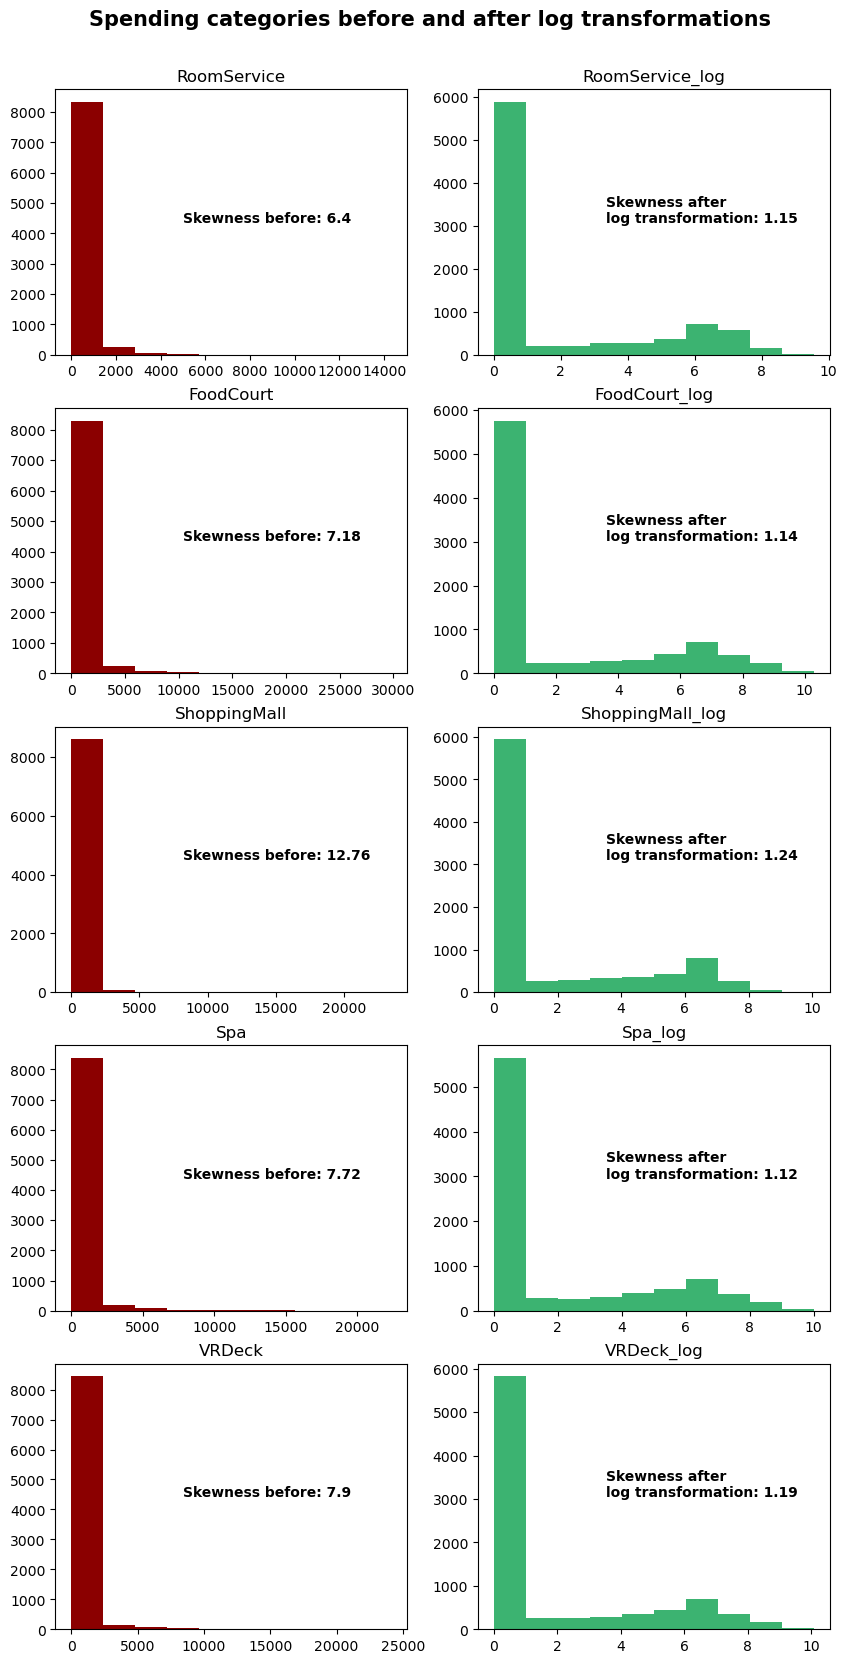

In [144]:
fig, ax = plt.subplots(5,2, figsize=(10,20))
plt.suptitle('Spending categories before and after log transformations', y=0.92, fontsize=15, weight='bold')

## during one iteration on enumerated loop we will create logarithmized column, calculate skewness of both columns and
## plot the on one row of our figure

for idx, column in enumerate(spendings_columns):
    
    new_column = column + '_log'
    df_train[new_column] = np.log(1+df_train[column])
    skewness_before = round(df_train[column].skew(),2)
    skewness_after = round(df_train[new_column].skew(),2)
    
    ax[idx,0].hist(df_train[column], bins=10, color='darkred')
    ax[idx,0].set_title(column)
    ax[idx,0].text(x=ax[idx,0].get_xlim()[1]/3, 
                   y=ax[idx,0].get_ylim()[1]/2, 
                   s=f'Skewness before: {skewness_before}', weight='bold')
    ax[idx,1].hist(df_train[new_column], bins=10, color='mediumseagreen')
    ax[idx,1].set_title(new_column)
    ax[idx,1].text(x=ax[idx,1].get_xlim()[1]/3, 
                   y=ax[idx,1].get_ylim()[1]/2, 
                   s=f'Skewness after \nlog transformation: {skewness_after}', weight='bold')

plt.show()

__We will also add the same transformation to test set if we decide to use it in final evaluation.__

__Our last custom transformer will add new columns with logarithmized values__

In [145]:
class AddLogColumn(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_log: list):
        self.columns_to_log = columns_to_log
    
    def fit(self, X, y = None ):
        return self 
    
    def transform(self, X, y = None ):
        
        for column in self.columns_to_log:
            new_column = column + '_log'
            X[new_column] = np.log(1+X[column])
        
        return X

In [146]:
log_transformer = AddLogColumn(columns_to_log=spendings_columns)
df_train = log_transformer.transform(df_train)

### Relationship - summary

__Finally we will create a table showing which values of different features have biggest impact (both positive and negative) on fact of being transported to other dimension.__

In [147]:
important_variables = pd.concat([grouping('HomePlanet'), grouping ('CryoSleep'), grouping ('Destination'), grouping ('VIP'),
                                 grouping ('CoPassengers'), grouping ('Deck'),grouping ('Side'), grouping ('AgeGroup'),
                                 grouping ('SpendingsGroups'), grouping ('RoomServiceGroups'), grouping ('FoodCourtGroups'), 
                                 grouping ('ShoppingMallGroups'), grouping ('SpaGroups'), grouping ('VRDeckGroups'),
                                 grouping ('Route')], ignore_index=True).sort_values(by='%_Transported', ascending=False).\
                                 reset_index(drop=True)

important_variables['abs_diff_from_avg'] = np.abs(important_variables['%_Transported'] - transported_pct)

## while creating tables of most influential characteristics we will focus on those groups that contain 
## at least 10% of population

most_likely_transported = important_variables[important_variables['Group_Size'] > 0.1 * df_train.shape[0]][:10]
least_likely_transported = important_variables[important_variables['Group_Size'] > 0.1 * df_train.shape[0]][-10:]
overall_biggest_impact = important_variables[important_variables['Group_Size'] > 0.1 * df_train.shape[0]]\
                        .sort_values(by='abs_diff_from_avg', ascending=False)[:10]

In [148]:
most_likely_transported

,Feature,Variable,%_Transported,Group_Size,abs_diff_from_avg
0,CryoSleep,1,0.808866,3113,0.305242
1,SpendingsGroups,nothing,0.786477,3653,0.282853
5,Route,Europa -> 55 Cancri e,0.688720,922,0.185097
8,HomePlanet,Europa,0.660239,2178,0.156615
12,Route,Europa -> TRAPPIST-1e,0.637833,1237,0.134210
13,SpaGroups,nothing,0.634465,5507,0.130842
14,RoomServiceGroups,nothing,0.627822,5758,0.124199
15,VRDeckGroups,nothing,0.624494,5683,0.120871
18,Destination,55 Cancri e,0.610132,1816,0.106509
19,ShoppingMallGroups,nothing,0.596894,5795,0.093270


In [149]:
least_likely_transported

,Feature,Variable,%_Transported,Group_Size,abs_diff_from_avg
49,Route,Earth -> TRAPPIST-1e,0.389985,3295,0.113639
52,Deck,E,0.360452,885,0.143172
55,CryoSleep,0,0.333333,5580,0.170290
56,FoodCourtGroups,average,0.310820,1525,0.192804
58,VRDeckGroups,average,0.304927,1502,0.198697
59,SpaGroups,average,0.293375,1585,0.210248
60,SpendingsGroups,average,0.288553,2516,0.215070
61,SpendingsGroups,low,0.282437,1264,0.221187
62,RoomServiceGroups,average,0.270492,1464,0.233132
63,ShoppingMallGroups,average,0.253453,1448,0.250171


In [150]:
overall_biggest_impact

,Feature,Variable,%_Transported,Group_Size,abs_diff_from_avg
0,CryoSleep,1,0.808866,3113,0.305242
1,SpendingsGroups,nothing,0.786477,3653,0.282853
63,ShoppingMallGroups,average,0.253453,1448,0.250171
62,RoomServiceGroups,average,0.270492,1464,0.233132
61,SpendingsGroups,low,0.282437,1264,0.221187
60,SpendingsGroups,average,0.288553,2516,0.215070
59,SpaGroups,average,0.293375,1585,0.210248
58,VRDeckGroups,average,0.304927,1502,0.198697
56,FoodCourtGroups,average,0.310820,1525,0.192804
5,Route,Europa -> 55 Cancri e,0.688720,922,0.185097


__We can say, more or less, that biggest impact on target variable have: CryoSleep, Spendings and Route__

## Preparing data for modeling

In [151]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupID,CoPassengers,Route,Deck,Side,AgeGroup,Spendings,SpendingsGroups,RoomServiceGroups,FoodCourtGroups,ShoppingMallGroups,SpaGroups,VRDeckGroups,Alone,RoomService_log,FoodCourt_log,ShoppingMall_log,Spa_log,VRDeck_log
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0001,0,Europa -> TRAPPIST-1e,B,P,middle_age,0.0,nothing,nothing,nothing,nothing,nothing,nothing,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0002,0,Earth -> TRAPPIST-1e,F,S,young_adult,736.0,low,average,low,average,average,average,1,4.700480,2.302585,3.258097,6.309918,3.806662
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0003,1,Europa -> TRAPPIST-1e,A,S,middle_age,10383.0,very_high,average,very_high,nothing,very_high,average,0,3.784190,8.182280,0.000000,8.812248,3.912023
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0003,1,Europa -> TRAPPIST-1e,A,S,young_adult,5176.0,high,nothing,high,average,very_high,average,0,0.000000,7.157735,5.918894,8.110728,5.267858
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0004,0,Earth -> TRAPPIST-1e,F,S,teenager,1091.0,average,average,average,average,average,low,1,5.717028,4.262680,5.023881,6.338594,1.098612


In [152]:
df_train.isna().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
Destination           0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Transported           0
GroupID               0
CoPassengers          0
Route                 0
Deck                  0
Side                  0
AgeGroup              0
Spendings             0
SpendingsGroups       0
RoomServiceGroups     0
FoodCourtGroups       0
ShoppingMallGroups    0
SpaGroups             0
VRDeckGroups          0
Alone                 0
RoomService_log       0
FoodCourt_log         0
ShoppingMall_log      0
Spa_log               0
VRDeck_log            0
dtype: int64

In [153]:
df_train.shape

(8693, 31)

In [154]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupID,CoPassengers,Route,Deck,Side,AgeGroup,Spendings,SpendingsGroups,RoomServiceGroups,FoodCourtGroups,ShoppingMallGroups,SpaGroups,VRDeckGroups,Alone,RoomService_log,FoodCourt_log,ShoppingMall_log,Spa_log,VRDeck_log
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0001,0,Europa -> TRAPPIST-1e,B,P,middle_age,0.0,nothing,nothing,nothing,nothing,nothing,nothing,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0002,0,Earth -> TRAPPIST-1e,F,S,young_adult,736.0,low,average,low,average,average,average,1,4.700480,2.302585,3.258097,6.309918,3.806662
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0003,1,Europa -> TRAPPIST-1e,A,S,middle_age,10383.0,very_high,average,very_high,nothing,very_high,average,0,3.784190,8.182280,0.000000,8.812248,3.912023
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0003,1,Europa -> TRAPPIST-1e,A,S,young_adult,5176.0,high,nothing,high,average,very_high,average,0,0.000000,7.157735,5.918894,8.110728,5.267858
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0004,0,Earth -> TRAPPIST-1e,F,S,teenager,1091.0,average,average,average,average,average,low,1,5.717028,4.262680,5.023881,6.338594,1.098612


In [155]:
df_copy = df_train.copy()

In [156]:
X_all = df_copy.drop('Transported', axis=1)
y = df_copy['Transported']

In [157]:
X_all.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'GroupID',
       'CoPassengers', 'Route', 'Deck', 'Side', 'AgeGroup', 'Spendings',
       'SpendingsGroups', 'RoomServiceGroups', 'FoodCourtGroups',
       'ShoppingMallGroups', 'SpaGroups', 'VRDeckGroups', 'Alone',
       'RoomService_log', 'FoodCourt_log', 'ShoppingMall_log', 'Spa_log',
       'VRDeck_log'],
      dtype='object')

In [158]:
df_train.dtypes

PassengerId             object
HomePlanet              object
CryoSleep                int32
Destination             object
Age                    float64
VIP                      int32
RoomService            float64
FoodCourt              float64
ShoppingMall           float64
Spa                    float64
VRDeck                 float64
Transported              int32
GroupID                 object
CoPassengers             int32
Route                   object
Deck                    object
Side                    object
AgeGroup              category
Spendings              float64
SpendingsGroups       category
RoomServiceGroups     category
FoodCourtGroups       category
ShoppingMallGroups    category
SpaGroups             category
VRDeckGroups          category
Alone                    int32
RoomService_log        float64
FoodCourt_log          float64
ShoppingMall_log       float64
Spa_log                float64
VRDeck_log             float64
dtype: object

__Now, we will choose columns that will be used for modeling, dividing them into: continuos, categorical and binary columns__

In [159]:
# X - data without log transformation

continuos_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

categorical_cols = ['HomePlanet', 'Destination', 'Deck', 'Side']

binary_cols = ['VIP', 'CryoSleep', 'Alone']


modeling_cols = categorical_cols + continuos_cols + binary_cols

continuos_transform = make_pipeline(StandardScaler())
categorcial_transform = make_pipeline(OneHotEncoder(drop='first'))

col_transform = ColumnTransformer(transformers=[('cont', continuos_transform, continuos_cols),
                                                ('cat', categorcial_transform, categorical_cols)],
                                                remainder='passthrough')

X = col_transform.fit_transform(X_all[modeling_cols])

In [160]:
columns_X = col_transform.get_feature_names_out()
pd.DataFrame(columns=columns_X, data=X)

,cont__Age,cont__RoomService,cont__FoodCourt,cont__ShoppingMall,cont__Spa,cont__VRDeck,cat__HomePlanet_Europa,cat__HomePlanet_Mars,cat__Destination_PSO J318.5-22,cat__Destination_TRAPPIST-1e,cat__Deck_B,cat__Deck_C,cat__Deck_D,cat__Deck_E,cat__Deck_F,cat__Deck_G,cat__Deck_T,cat__Side_S,remainder__VIP,remainder__CryoSleep,remainder__Alone
0,0.708635,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.336885,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2.032961,-0.268001,1.959998,-0.283579,5.695623,-0.219796,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.290427,-0.333105,0.523010,0.336851,2.687176,-0.092818,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.894495,0.125652,-0.237159,-0.031059,0.231374,-0.261240,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.848038,-0.333105,3.992336,-0.283579,1.189173,-0.197751,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8689,-0.755093,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
8690,-0.197482,-0.333105,-0.281027,2.846999,-0.269737,-0.263003,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8691,0.220726,-0.333105,0.376365,-0.283579,0.043013,2.589576,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [161]:
# X - data with log transformation

continuos_cols = ['Age', 'RoomService_log', 'FoodCourt_log', 'ShoppingMall_log', 'Spa_log', 'VRDeck_log']

categorical_cols = ['HomePlanet', 'Destination', 'Deck', 'Side']

binary_cols = ['VIP', 'CryoSleep', 'Alone']

modeling_cols = categorical_cols + continuos_cols + binary_cols


continuos_transform = make_pipeline(StandardScaler())
categorcial_transform = make_pipeline(OneHotEncoder(drop='first'))

col_transform_log = ColumnTransformer(transformers=[('cont', continuos_transform, continuos_cols),
                                                ('cat', categorcial_transform, categorical_cols)],
                                                remainder='passthrough')

X_log = col_transform_log.fit_transform(X_all[modeling_cols])

columns_log = col_transform_log.get_feature_names_out()

__PCA__

__We will also perform simple PCA to check how much variance is explained by components and maybe to reduce some least important components.__

__First, let's reduce data to 2 components in order to take a look at our data on 2-dimensional chart.__

In [162]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X)

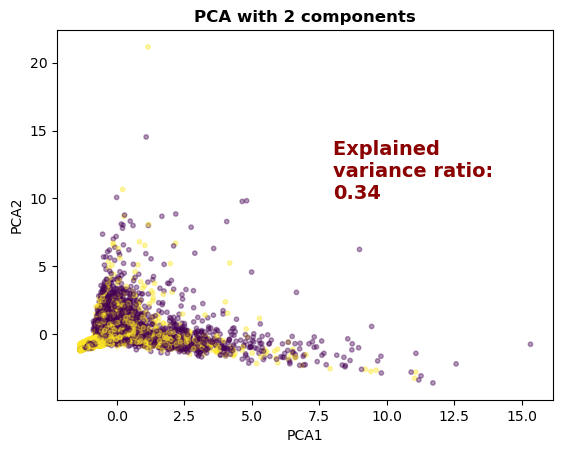

In [163]:
plt.scatter(x=X_pca2[:,0], y=X_pca2[:,1], c=y, alpha=0.4, s=10)
explained_variance = round(sum(pca2.explained_variance_ratio_),2)
plt.title('PCA with 2 components', weight='bold')
plt.text(8,10, f'Explained \nvariance ratio: \n{explained_variance}', fontsize=14, c='darkred', weight='bold')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

__As we can see on the chart above, data reduced to 2 components explains less than 30% of variance but even on this level we can see that there are clearly areas where certain y values dominate.__

In [164]:
pca = PCA()
X_pca = pca.fit_transform(X)

__We will now create two additional X datasets using PCA. First will explain 80% of variance and other 95%. We will see how it will affect our accuracy at later stage.__

In [165]:
pca80 = PCA(n_components=0.8)
pca95 = PCA(n_components=0.95)
X_pca80 = pca80.fit_transform(X)
X_pca95 = pca95.fit_transform(X)

In [166]:
colors = ['mediumseagreen'] * 21

colors = ['darkred' if i in [pca80.n_components_ -1, pca95.n_components_ -1] else color for i, color in enumerate(colors)]

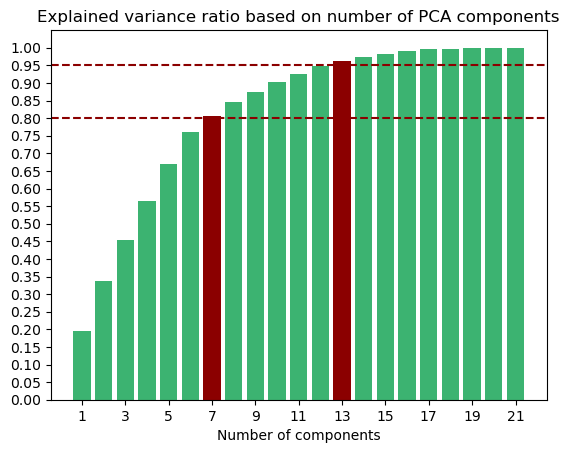

In [167]:
plt.bar(range(1,pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_), color=colors)
plt.title('Explained variance ratio based on number of PCA components')
plt.axhline(0.8, c='darkred', ls='--')
plt.axhline(0.95, c='darkred', ls='--')
plt.xlabel('Number of components')
plt.xticks(range(1,22,2))
plt.yticks(np.arange(0.0,1.05,0.05))
plt.show()

__As seen above 80% of variance is explained by 8 components and 95% by 13. In general we have 21 features in selected dataset.__

__Our final set of Xs used for modeling will look as below:__ 

In [168]:
Xs = {'X' : X,
      'X_log' : X_log,
      'X_pca80' : X_pca80,
      'X_pca95' : X_pca95}

## Modeling

__Selected models:__
1) Logistic Regression
2) Naive Bayes Classifier
3) Support Vector Machine
4) K Nearest Neighbours
5) Tree Classifier
6) Random Forest Classifier
7) Gradient Boosting



__We will use the same method of splitting data for cross-validation for all models:__

In [169]:
kf = KFold(n_splits=5, shuffle=True, random_state=7)

__First, we will prepare function which will perform Grid Search on given model for every set of X values. It will also save best fitted model for every set of params to pickle file and return info table in order to compare different Xs and params__

In [170]:
def compare_models(Xs, params, estimator, model_name):
    
    results = pd.DataFrame(columns=['X_data', 'Model', 'Pickle_name', 'Best_params', 'Accuracy', 'Time'])
    
    # we use dictionaries of Xs and params in order to have convenient access to their names
    
    for x_name, data in Xs.items():

        for params_name, param_grid in params.items():

            model = GridSearchCV(estimator=estimator,
                                 param_grid=param_grid,
                                 scoring='accuracy',
                                 cv=kf,
                                 n_jobs=-1)
    
            # while fitting model we measure time for further analysis
            start_time = tm.time()
            model.fit(data,y)
            time = tm.time() - start_time
            name = 'models/' + x_name + '_' + params_name + '.p'
            # saving model with best accuracy to pickle
            pickle.dump(model.best_estimator_, open(name, 'wb'))

            new = pd.DataFrame({'X_data' : [x_name],
                                'Model' : [model_name],
                                'Pickle_name' : [name.split('/')[1]],                        
                                'Best_params' : [model.best_params_],
                                'Accuracy' : [model.best_score_],
                                'Time' : [time]})

            results = pd.concat([results, new], axis=0).reset_index(drop=True)

            
    return results

__Second function we prepare is the one that will plot our results__

In [171]:
def plot_models(results):
    
    average_acc = round(results['Accuracy'].mean(),4)
    
    xs_acc = results[['X_data', 'Accuracy']].sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
    xs_time = results[['X_data', 'Time']].sort_values(by='Time', ascending=False).reset_index(drop=True)
    
    model_name = results['Model'][0]
    
    # we will draw two plots, one comapring accuracy for different models and other comparing fitting time
    
    fix,ax = plt.subplots(1,2, figsize=(10,5))

    plt.suptitle('Comparisons based on used data: ' + model_name)

    bar0 = ax[0].bar(x=xs_acc['X_data'], height=xs_acc['Accuracy'], color='mediumseagreen')
    ax[0].axhline(average_acc, ls='--', c='darkred')
    ax[0].bar_label(bar0, fmt='%.4f', label_type='center', c='darkred')
    ax[0].set_title('Accuracy')
    ax[0].text(x=ax[0].get_xlim()[1], y=average_acc+0.003, ha='right', s=f'Average accuracy: {average_acc}', c='darkred', weight='bold')
    ax[0].set_ylim(results['Accuracy'].min()-0.08, results['Accuracy'].max()+0.02)

    bar1 = ax[1].bar(x=xs_time['X_data'], height=xs_time['Time'], color='mediumseagreen')
    ax[1].set_title('Time')
    ax[1].bar_label(bar1, fmt='%.2f', label_type='center', c='darkred')


    plt.show()

### Logistic Regression

In [172]:
# because different penalty methods are compatible with different solvers we will create multiple sets of params for 
# grid search

lr_params1 = {'solver' : ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag'],
              'penalty' : ['l2', None],
              'C' : [0.001, 0.01, 0.1, 1, 3, 5, 10],
              'max_iter' : [100, 250, 500]}

lr_params2 = {'solver' : ['liblinear'],
              'penalty' : ['l1', 'l2'],
              'C' : [0.001, 0.01, 0.1, 1, 3, 5, 10],
              'max_iter' : [100, 250, 500]}

lr_params3 = {'solver' : ['saga'],
              'penalty' : ['elasticnet', 'l1', 'l2', None],
              'C' : [0.001, 0.01, 0.1, 1, 3, 5, 10],
              'max_iter' : [100, 250, 500]}

lr_params = {'lr_params1' : lr_params1,
             'lr_params2' : lr_params2,
             'lr_params3' : lr_params3}

In [173]:
# # Code below is commented because fitting models took a lot of time in some cases. We fitted models once and saved 
# # results as well as fitted models in pickle files.

# lr_results = compare_models(Xs, lr_params, LogisticRegression(), "Logistic Regression")

# # we will use code below to choose only one set of params per each X data
# lr_results = lr_results.sort_values(by='Accuracy', ascending=False).groupby('X_data').head(1).reset_index(drop=True)

# lr_results.to_pickle('results/lr_results.p')

In [174]:
lr_results = pd.read_pickle('results/lr_results.p')

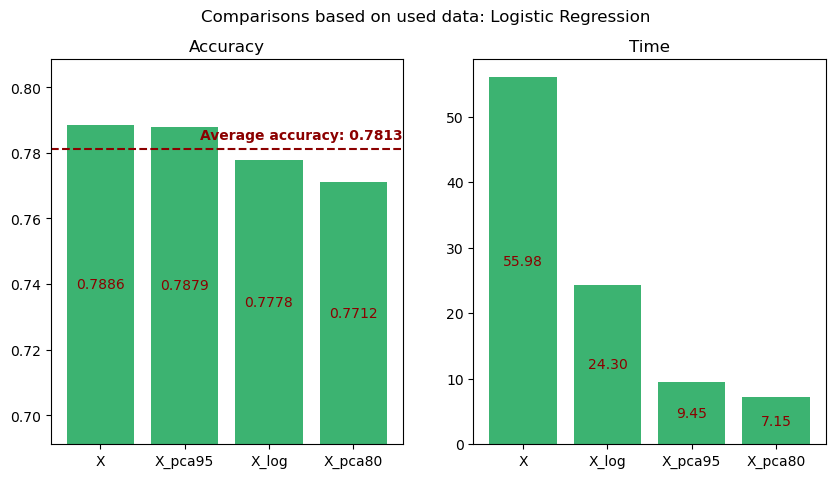

In [175]:
plot_models(lr_results)

__COM

__We can take a look at coefficients for each feature. In simplification, if data is scaled properly the higher coefficient, the more important feature is for the model.__

In [176]:
lr_results

,X_data,Model,Pickle_name,Best_params,Accuracy,Time
0,X,Logistic Regression,X_lr_params1.p,"{'C': 3, 'max_iter': 100, 'penalty': 'l2', 'so...",0.788566,55.979457
1,X_pca95,Logistic Regression,X_pca95_lr_params1.p,"{'C': 0.001, 'max_iter': 500, 'penalty': 'l2',...",0.787876,9.453035
2,X_log,Logistic Regression,X_log_lr_params3.p,"{'C': 0.1, 'max_iter': 500, 'penalty': 'l1', '...",0.777752,24.297323
3,X_pca80,Logistic Regression,X_pca80_lr_params1.p,"{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'so...",0.771196,7.148673


In [177]:
lr_model = pickle.load(open('models/X_lr_params1.p', 'rb'))

In [178]:
pd.DataFrame({'Feature' : columns_X,'Coef' : np.abs(lr_model.coef_[0])}).sort_values(by='Coef', ascending=False).reset_index(drop=True)

,Feature,Coef
0,cat__Deck_C,2.346321
1,cont__Spa,2.297737
2,cont__VRDeck,2.194433
3,cat__HomePlanet_Europa,1.628447
4,remainder__CryoSleep,1.279248
5,cat__Deck_B,1.121495
6,cont__RoomService,1.019934
7,cont__FoodCourt,0.790628
8,cat__Deck_F,0.769740
9,cat__Deck_D,0.593826


#### Polynomial Features

__Let's see if adding Polynomial of some degree will improve the results__

In [179]:
pf_pipeline = make_pipeline(
    PolynomialFeatures(),
    LogisticRegression())

pf_params1 = {'polynomialfeatures__degree' : [1,2,3]}

pf_params = {'pf_params1' : pf_params1}

In [180]:
# pf_results = compare_models(Xs, pf_params, pf_pipeline, 'Polynomial Features')
# pf_results.to_pickle('results/pf_results.p')

In [181]:
pf_results = pd.read_pickle('results/pf_results.p')

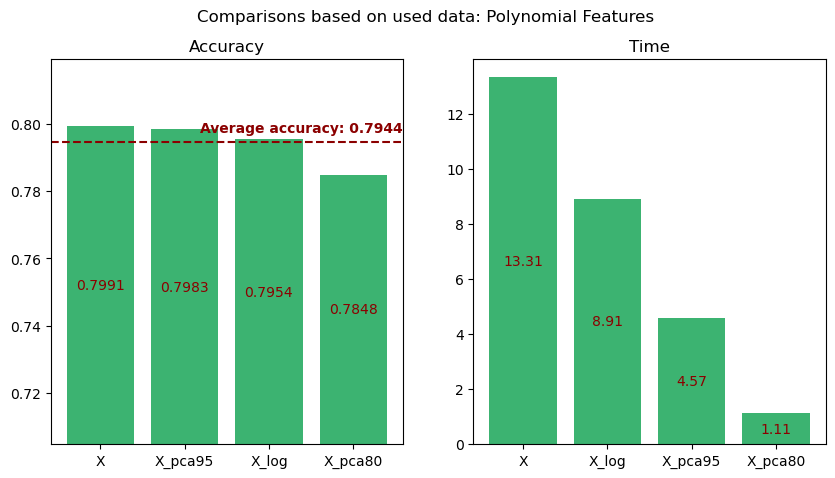

In [182]:
plot_models(pf_results)

In [183]:
pf_results

,X_data,Model,Pickle_name,Best_params,Accuracy,Time
0,X,Polynomial Features,X_pf_params1.p,{'polynomialfeatures__degree': 2},0.799149,13.314930
1,X_log,Polynomial Features,X_log_pf_params1.p,{'polynomialfeatures__degree': 2},0.795353,8.905100
2,X_pca80,Polynomial Features,X_pca80_pf_params1.p,{'polynomialfeatures__degree': 3},0.784769,1.113386
3,X_pca95,Polynomial Features,X_pca95_pf_params1.p,{'polynomialfeatures__degree': 3},0.798344,4.572918


__We can see that for all X datas degree=2 is best option to choose. We will adjust the other parameters before we start analyzing.__ 

__Adjusted PF__

In [184]:
pf2_pipeline = make_pipeline(
    PolynomialFeatures(degree=2),
    LogisticRegression())

pf2_params1 = {'logisticregression__solver' : ['lbfgs'],
              'logisticregression__penalty' : ['l2', None],
              'logisticregression__C' : [0.01, 0.1, 1, 5],
              'logisticregression__max_iter' : [100]}

pf2_params2 = {'logisticregression__solver' : ['liblinear'],
              'logisticregression__penalty' : ['l1', 'l2'],
              'logisticregression__C' : [0.01, 0.1, 1, 5],
              'logisticregression__max_iter' : [100]}

pf2_params3 = {'logisticregression__solver' : ['saga'],
              'logisticregression__penalty' : ['elasticnet', 'l1', 'l2', None],
              'logisticregression__C' : [0.01, 0.1, 1, 5],
              'logisticregression__max_iter' : [100]}

pf2_params = {'pf2_params1' : pf2_params1,
              'pf2_params2' : pf2_params2,
              'pf2_params3' : pf2_params3}

In [185]:
# pf2_results = compare_models(Xs, pf2_params, pf2_pipeline, "Polynomial Features degree=2")
# pf2_results = pf2_results.sort_values(by='Accuracy', ascending=False).groupby('X_data').head(1).reset_index(drop=True)
# pf2_results.to_pickle('results/pf2_results.p')

In [186]:
pf2_results = pd.read_pickle('results/pf2_results.p')

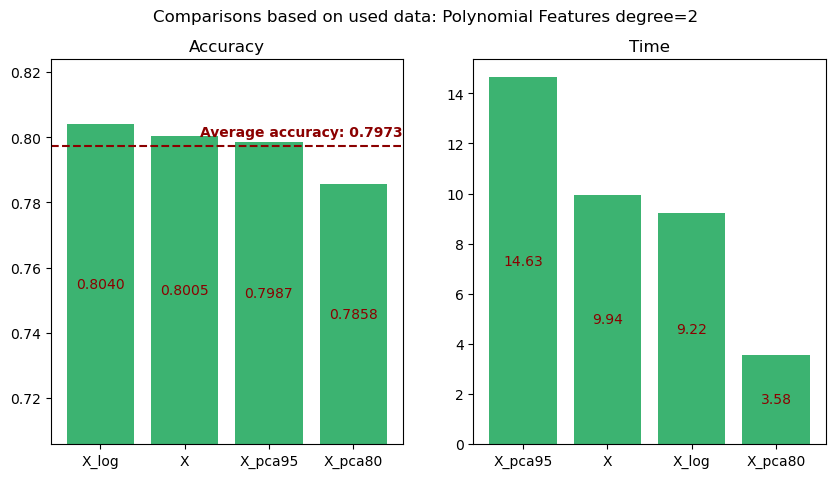

In [187]:
plot_models(pf2_results)

__We achieved higher accuracy adding polynomial features of second degree to logistic regression for all datasets. Xs without PCA performed better.__

### Naive Bayes

In [188]:
nb_params1 = {'alpha' : range(1,11)}
nb_params = {'nb_params' : nb_params1}

In [189]:
# nb_results = compare_models(Xs, nb_params, BernoulliNB(), 'Naive Bayes')
# nb_results.to_pickle('results/nb_results.p')

In [190]:
nb_results = pd.read_pickle('results/nb_results.p')

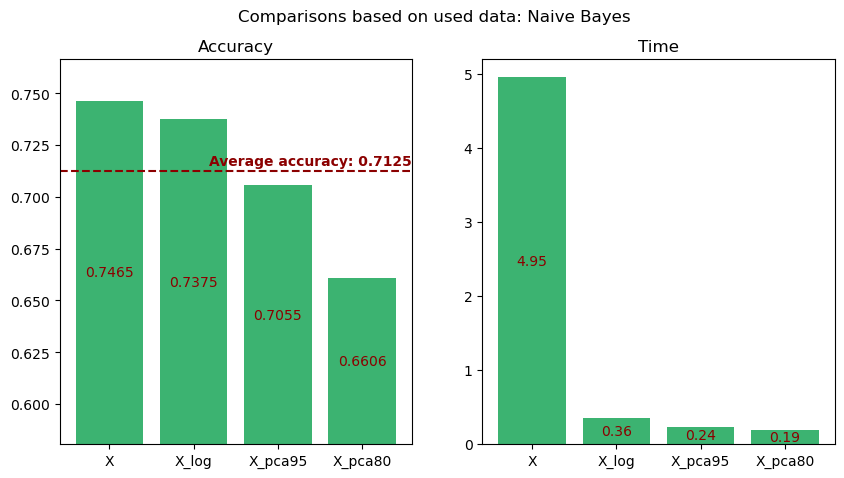

In [191]:
plot_models(nb_results)

__As we can see Naive Bayes accuracy is significantly lower than using earlier models.__

### Support Vector Machine

In [192]:
svm_params1 = {'C' : range(1,11),
               'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svm_params = {'svm_params' : svm_params1}

In [193]:
# svm_results = compare_models(Xs, svm_params, SVC(), 'Support Vector Machine')
# svm_results.to_pickle('results/svm_results.p')

In [194]:
svm_results = pd.read_pickle('results/svm_results.p')

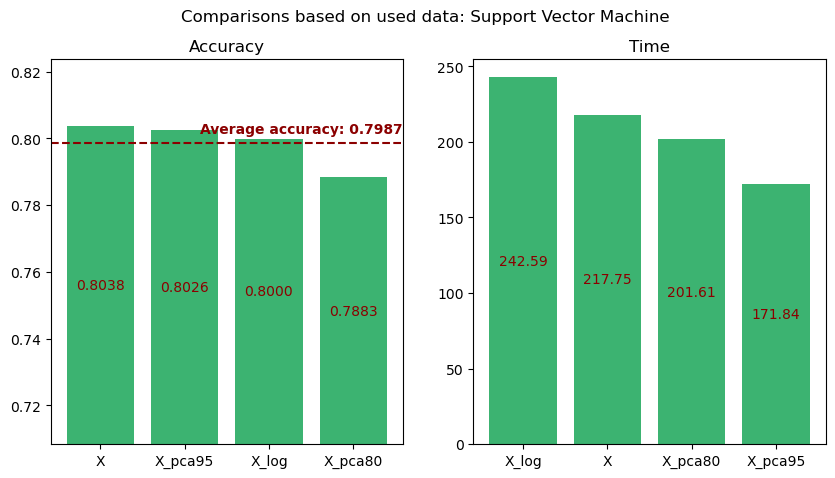

In [195]:
plot_models(svm_results)

### K-nearest Neighbours

In [196]:
knn_params1 = {'weights' : ['uniform', 'distance'],
               'n_neighbors' : range(5,200,10)}

knn_params = {'knn_params' : knn_params1}

In [197]:
# knn_results = compare_models(Xs, knn_params, KNeighborsClassifier(), 'K-nearest Neighbours')
# knn_results.to_pickle('results/knn_results.p')

In [198]:
knn_results = pd.read_pickle('results/knn_results.p')

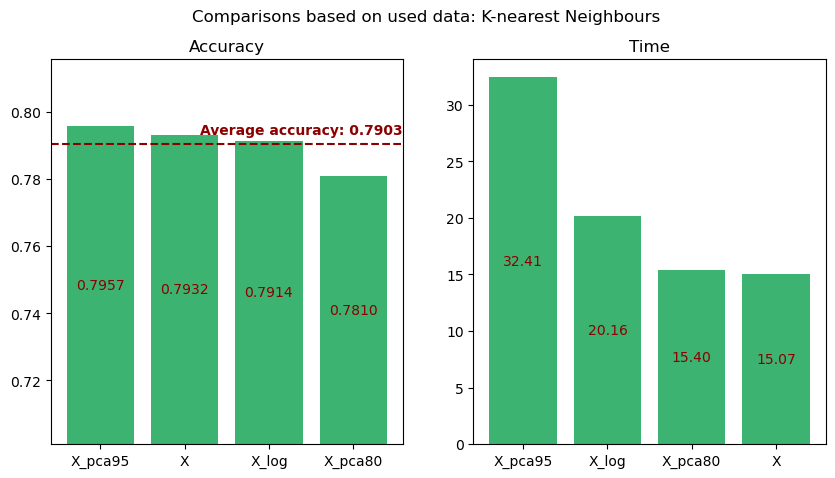

In [199]:
plot_models(knn_results)

### Tree Classifier

In [200]:
tree_params1 = {'max_depth': [3,5,8,10,12,15, None],
                'max_features': [0.25, 0.5, 0.75, None],
                'min_samples_split' : [2,5,8,10,15,20],
                'min_samples_leaf' : [1,3,5,8,10],
                'criterion' : ['gini', 'entropy']}

tree_params = {'tree_params' : tree_params1}

In [201]:
# tree_results = compare_models(Xs, tree_params, DecisionTreeClassifier(), 'Tree Classifier')
# tree_results.to_pickle('results/tree_results.p')

In [202]:
tree_results = pd.read_pickle('results/tree_results.p')

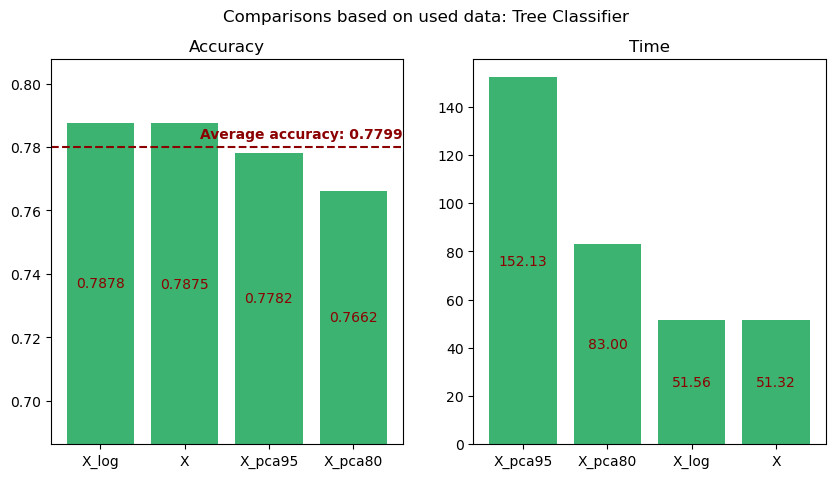

In [203]:
plot_models(tree_results)

In [204]:
tree_results

,X_data,Model,Pickle_name,Best_params,Accuracy,Time
0,X,Tree Classifier,X_tree_params.p,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.787530,51.316284
1,X_log,Tree Classifier,X_log_tree_params.p,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.787760,51.559536
2,X_pca80,Tree Classifier,X_pca80_tree_params.p,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",0.766249,82.997179
3,X_pca95,Tree Classifier,X_pca95_tree_params.p,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.778214,152.133343


In [205]:
tree_best_model = pickle.load(open('models/X_tree_params.p', 'rb'))

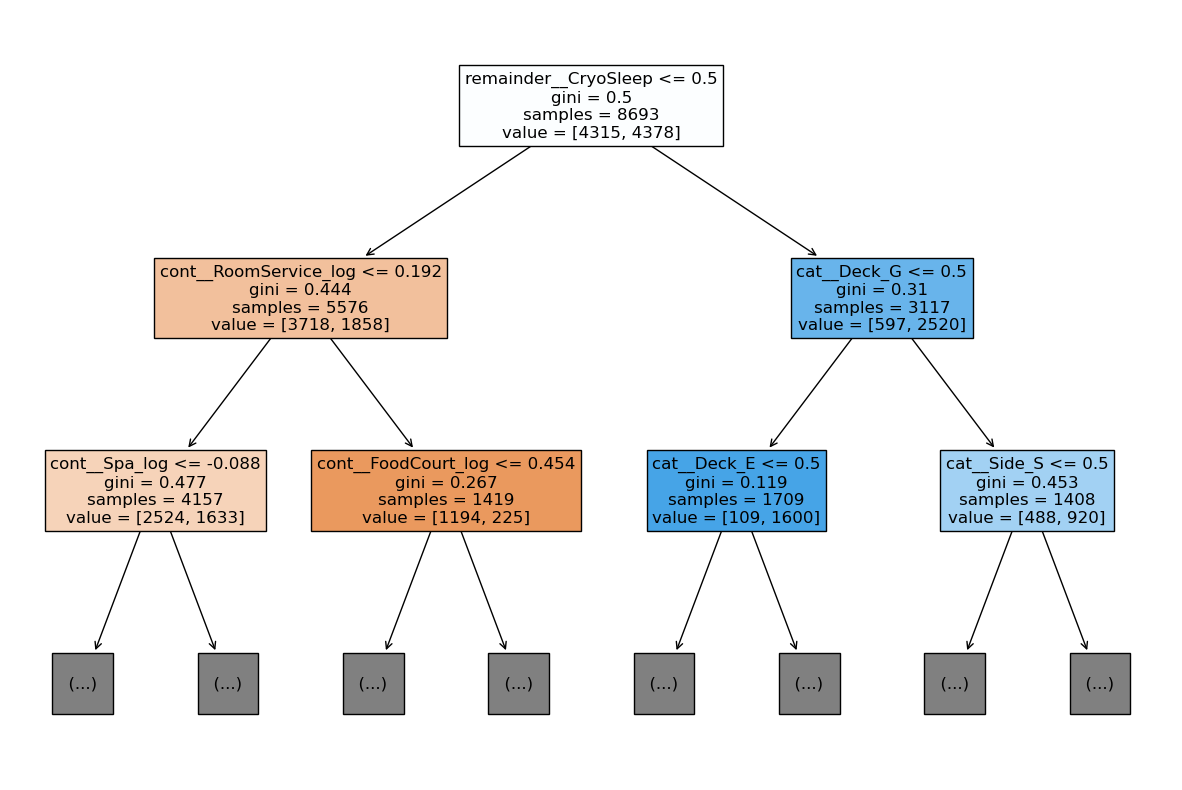

In [206]:
plt.subplots(figsize=(15,10))
plot_tree(tree_best_model, max_depth=2, feature_names=columns_log, filled=True, fontsize=12)
plt.show()

In [207]:
pd.DataFrame({'Column' : columns_log, 'Importances' : tree_best_model.feature_importances_}).\
            sort_values(by='Importances', ascending=False)

,Column,Importances
19,remainder__CryoSleep,0.435035
5,cont__VRDeck_log,0.113196
4,cont__Spa_log,0.112262
1,cont__RoomService_log,0.074770
2,cont__FoodCourt_log,0.072836
15,cat__Deck_G,0.066320
0,cont__Age,0.036508
3,cont__ShoppingMall_log,0.022991
13,cat__Deck_E,0.018629
17,cat__Side_S,0.017041


### Random Forest

In [208]:
forest_params1 = {'n_estimators': [50, 100, 250],
                  'criterion' : ['gini', 'entropy'],
                  'max_depth' : [5,10,15],
                  'min_samples_split' : [2,5,8,10],
                  'max_features' : [0.25, 0.5, 0.75, None]}

forest_params = {'forest_params' : forest_params1}

In [209]:
# forest_results = compare_models(Xs, forest_params, RandomForestClassifier(), 'Random Forest')
# forest_results.to_pickle('results/forest_results.p')

In [210]:
forest_results = pd.read_pickle('results/forest_results.p')

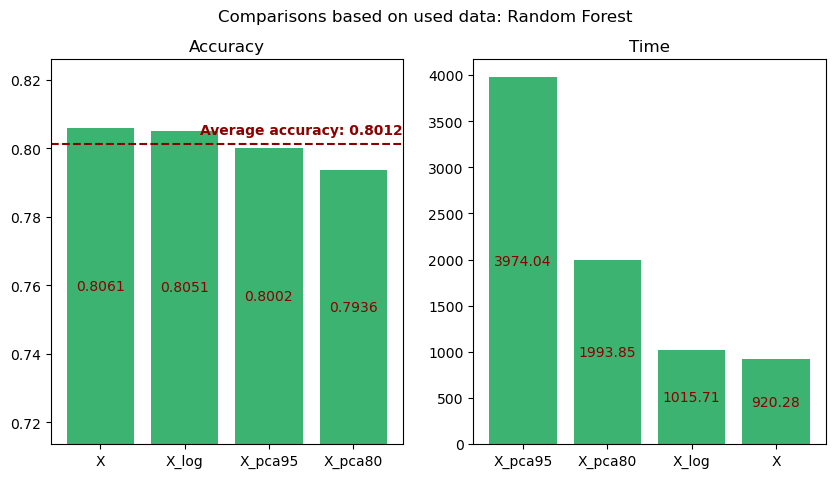

In [211]:
plot_models(forest_results)

### Gradient Boosting

In [212]:
gb_params1 = {"n_estimators": [100,125,150],
                "learning_rate": [0.01, 0.05, 0.1, 0.5],
                "max_depth": [4,5,6],
                "subsample": [0.5,0.75, 1.0],
                "colsample_bynode": [0.5,0.75, 1.0],
                "max_leaves" : [3, 5, 10, None]}

gb_params = {'gb_params' : gb_params1}

In [213]:
# gb_results = compare_models(Xs, gb_params, XGBClassifier(), 'Gradient Boosting')
# gb_results.to_pickle('results/gb_results.p')

In [214]:
gb_results = pd.read_pickle('results/gb_results.p')

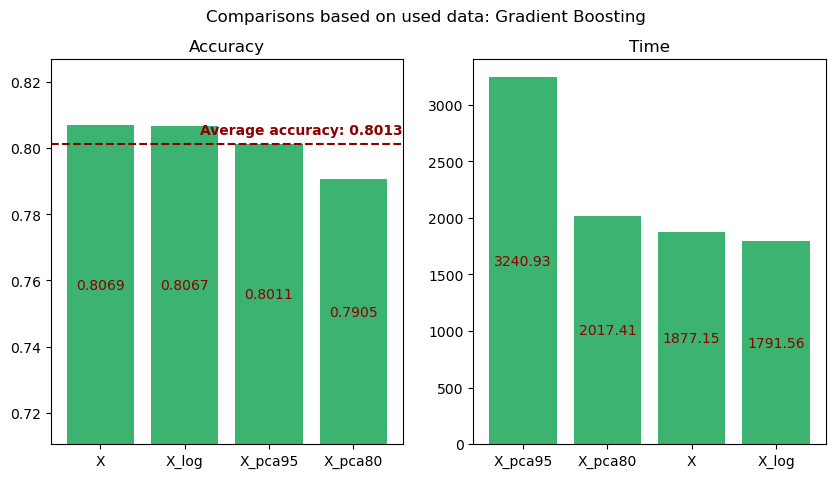

In [215]:
plot_models(gb_results)

### Results

__Let's aggregate all results and find out which models and sets of data gave the best results.__

In [216]:
agg_results = pd.concat([lr_results, pf2_results, nb_results, knn_results, tree_results, 
                         forest_results, gb_results, svm_results])

agg_results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

,X_data,Model,Pickle_name,Best_params,Accuracy,Time
0,X,Gradient Boosting,X_gb_params.p,"{'colsample_bynode': 0.75, 'learning_rate': 0....",0.806856,1877.152292
1,X_log,Gradient Boosting,X_log_gb_params.p,"{'colsample_bynode': 0.5, 'learning_rate': 0.0...",0.806741,1791.555952
2,X,Random Forest,X_forest_params.p,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.806051,920.280821
3,X_log,Random Forest,X_log_forest_params.p,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.805131,1015.712327
4,X_log,Polynomial Features degree=2,X_log_pf2_params2.p,"{'logisticregression__C': 0.1, 'logisticregres...",0.803981,9.215826
5,X,Support Vector Machine,X_svm_params.p,"{'C': 8, 'kernel': 'rbf'}",0.803751,217.746749
6,X_pca95,Support Vector Machine,X_pca95_svm_params.p,"{'C': 10, 'kernel': 'rbf'}",0.802600,171.842477
7,X_pca95,Gradient Boosting,X_pca95_gb_params.p,"{'colsample_bynode': 0.75, 'learning_rate': 0....",0.801105,3240.925300
8,X,Polynomial Features degree=2,X_pf2_params2.p,"{'logisticregression__C': 0.1, 'logisticregres...",0.800530,9.941764
9,X_pca95,Random Forest,X_pca95_forest_params.p,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.800185,3974.039139


__We will now visualize accuracy for different models with different x data used. We will highlight with colors models that have accuracy higher than 0.79__

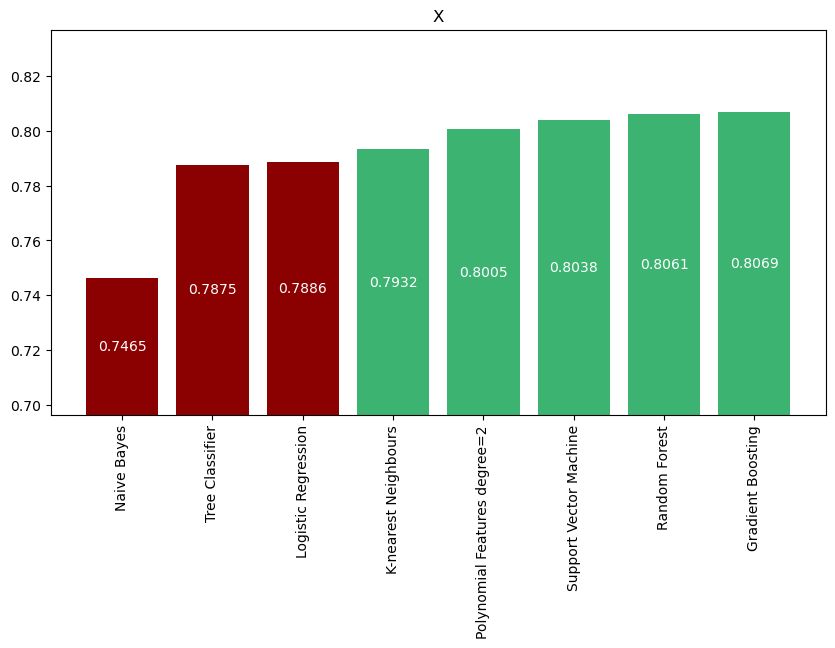

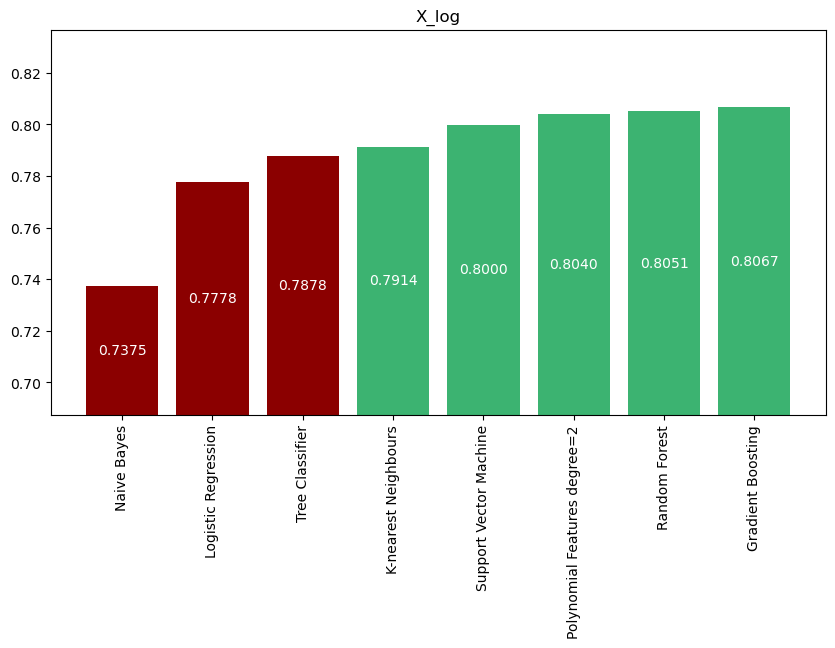

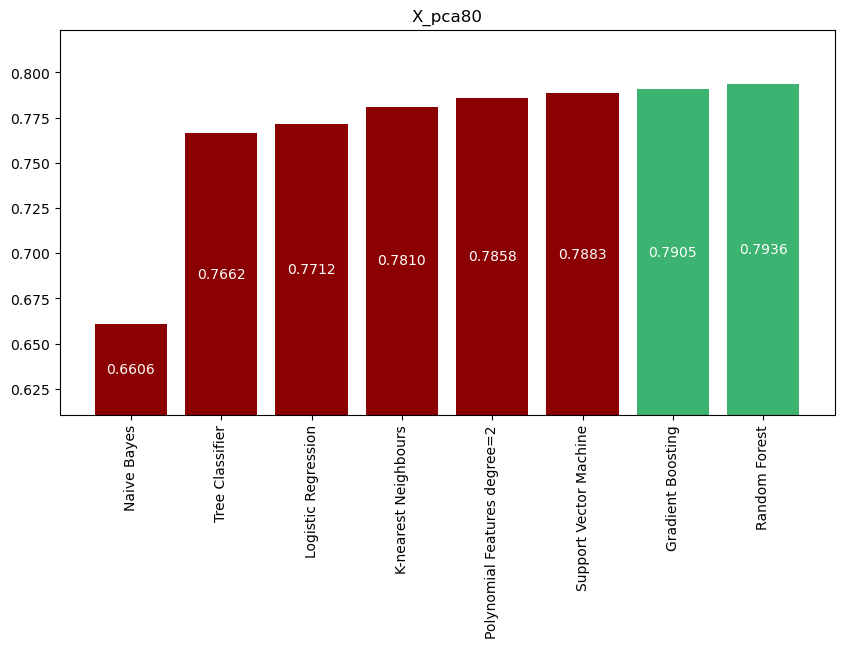

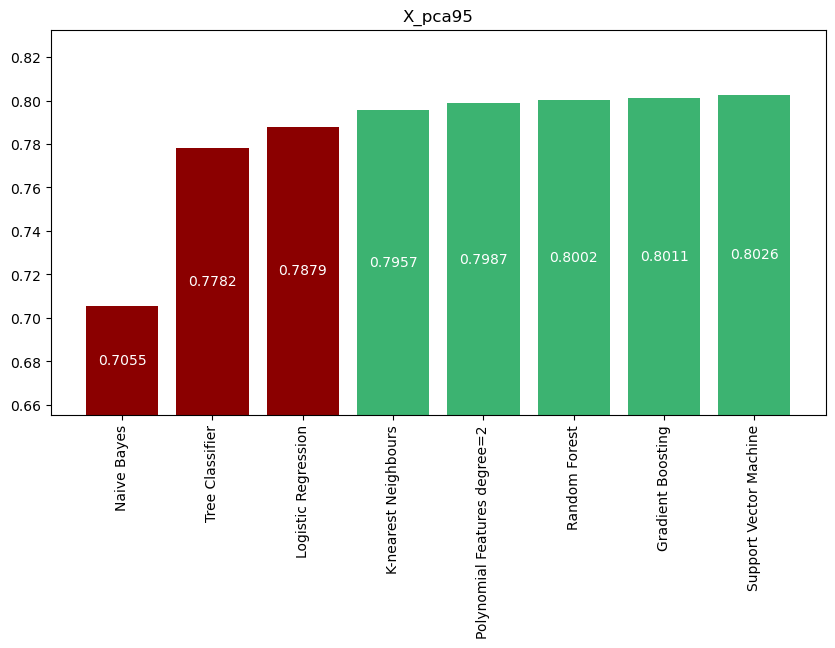

In [217]:
for x_data in Xs.keys():

    temp = agg_results[agg_results['X_data']==x_data].sort_values(by='Accuracy')
    color = ['darkred' if accuracy<0.79 else 'mediumseagreen' for accuracy in temp['Accuracy']]
    
    fig, ax = plt.subplots(figsize=(10,5))
    bar = ax.bar(x=temp['Model'], height=temp['Accuracy'], color=color)
    plt.bar_label(bar, fmt='%.4f', label_type='center', c='white')
    ax.set_xticklabels(temp['Model'], rotation=90)
    ax.set_ylim(temp['Accuracy'].min()-0.05, temp['Accuracy'].max()+0.03)
    ax.set_title(x_data)
    plt.show()

__PCA80 performs significantly worse than others.__

__Some models underestimate results. We will then look only on models that gave the accuracy higher than 0.79__

In [218]:
agg_results[agg_results['Accuracy']>0.79].sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

,X_data,Model,Pickle_name,Best_params,Accuracy,Time
0,X,Gradient Boosting,X_gb_params.p,"{'colsample_bynode': 0.75, 'learning_rate': 0....",0.806856,1877.152292
1,X_log,Gradient Boosting,X_log_gb_params.p,"{'colsample_bynode': 0.5, 'learning_rate': 0.0...",0.806741,1791.555952
2,X,Random Forest,X_forest_params.p,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.806051,920.280821
3,X_log,Random Forest,X_log_forest_params.p,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.805131,1015.712327
4,X_log,Polynomial Features degree=2,X_log_pf2_params2.p,"{'logisticregression__C': 0.1, 'logisticregres...",0.803981,9.215826
5,X,Support Vector Machine,X_svm_params.p,"{'C': 8, 'kernel': 'rbf'}",0.803751,217.746749
6,X_pca95,Support Vector Machine,X_pca95_svm_params.p,"{'C': 10, 'kernel': 'rbf'}",0.802600,171.842477
7,X_pca95,Gradient Boosting,X_pca95_gb_params.p,"{'colsample_bynode': 0.75, 'learning_rate': 0....",0.801105,3240.925300
8,X,Polynomial Features degree=2,X_pf2_params2.p,"{'logisticregression__C': 0.1, 'logisticregres...",0.800530,9.941764
9,X_pca95,Random Forest,X_pca95_forest_params.p,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.800185,3974.039139


__We can see that six models with best accuracy use X or X_log set. As our goal is to make best prediction, from now on, we will focus only on these to sets.__

In [219]:
agg_results[agg_results['X_data'].isin(['X', 'X_log'])].sort_values(by='Accuracy', ascending=False)

,X_data,Model,Pickle_name,Best_params,Accuracy,Time
0,X,Gradient Boosting,X_gb_params.p,"{'colsample_bynode': 0.75, 'learning_rate': 0....",0.806856,1877.152292
1,X_log,Gradient Boosting,X_log_gb_params.p,"{'colsample_bynode': 0.5, 'learning_rate': 0.0...",0.806741,1791.555952
0,X,Random Forest,X_forest_params.p,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.806051,920.280821
1,X_log,Random Forest,X_log_forest_params.p,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.805131,1015.712327
0,X_log,Polynomial Features degree=2,X_log_pf2_params2.p,"{'logisticregression__C': 0.1, 'logisticregres...",0.803981,9.215826
0,X,Support Vector Machine,X_svm_params.p,"{'C': 8, 'kernel': 'rbf'}",0.803751,217.746749
1,X,Polynomial Features degree=2,X_pf2_params2.p,"{'logisticregression__C': 0.1, 'logisticregres...",0.800530,9.941764
1,X_log,Support Vector Machine,X_log_svm_params.p,"{'C': 2, 'kernel': 'rbf'}",0.799956,242.593053
0,X,K-nearest Neighbours,X_knn_params.p,"{'n_neighbors': 45, 'weights': 'uniform'}",0.793167,15.069067
1,X_log,K-nearest Neighbours,X_log_knn_params.p,"{'n_neighbors': 35, 'weights': 'uniform'}",0.791442,20.160239


__We can see that Gradient Boosting achieved best accuracy for both X data. Second, and very close to GB, is Random Forest. X_log data has better result for Polynomial Features than Support Vector Machines but for X it's opposite. Almost all results for these four models achieved accuracy higher than 0.8 (except one by small margin). Next models accuracies are clearly lower. Therefore we will use these four models to use in voting classifier.__

__X log__

In [220]:
log_model_gb = pickle.load(open('models/X_log_gb_params.p', 'rb'))
log_model_forest = pickle.load(open('models/X_log_forest_params.p', 'rb'))
log_model_pf = pickle.load(open('models/X_log_pf2_params2.p', 'rb'))
log_model_svm = pickle.load(open('models/X_log_svm_params.p', 'rb'))

In [221]:
estimators = [
    ('Gradient Boosting', log_model_gb),
    ('Random Forest', log_model_forest),
    ('Polynomial Features', log_model_pf),
    ('SVM', log_model_svm)
]

# because we use even number of estimators, we will add more weight to most accurate estimator (GB) in case of a tie

vc = VotingClassifier(estimators=estimators, weights=[3,2,2,2])

voting_model_log = GridSearchCV(estimator=vc,
                            param_grid={'voting' : ['hard']},
                            scoring='accuracy',
                            cv=kf,
                            n_jobs=-1)

voting_model_log.fit(X_log, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=VotingClassifier(estimators=[('Gradient Boosting',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=0.5,
                                                                   colsample_bytree=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric=None,
                                                                   feature_types=None,
                                                                   gamma=None,
                                                                   gpu_id...
                                                     RandomForestClassifier(criterion='entropy',
                                                                            max_depth=10,
                                                                            max_features=0.25,
                                                                            min_samples_split=5,
                                                                            n_estimators=250)),
                                                    ('Polynomial Features',
                                                     Pipeline(steps=[('polynomialfeatures',
                                                                      PolynomialFeatures()),
                                                                     ('logisticregression',
                                                                      LogisticRegression(C=0.1,
                                                                                         penalty='l1',
                                                                                         solver='liblinear'))])),
                                                    ('SVM', SVC(C=2))],
                                        weights=[3, 2, 2, 2]),
             n_jobs=-1, param_grid={'voting': ['hard']}, scoring='accuracy')

In [222]:
voting_model_log.best_score_

0.8077773094201858

__X__

In [223]:
x_model_gb = pickle.load(open('models/X_gb_params.p', 'rb'))
x_model_forest = pickle.load(open('models/X_forest_params.p', 'rb'))
x_model_pf = pickle.load(open('models/X_pf2_params2.p', 'rb'))
x_model_svm = pickle.load(open('models/X_svm_params.p', 'rb'))

In [224]:
estimators = [
    ('Gradient Boosting', x_model_gb),
    ('Random Forest', x_model_forest),
    ('Polynomial Features', x_model_pf),
    ('SVM', x_model_svm)
]

vc = VotingClassifier(estimators=estimators, weights=[3,2,2,2])

voting_model_x = GridSearchCV(estimator=vc,
                            param_grid={'voting' : ['hard']},
                            scoring='accuracy',
                            cv=kf,
                            n_jobs=-1)

voting_model_x.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=VotingClassifier(estimators=[('Gradient Boosting',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=0.75,
                                                                   colsample_bytree=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric=None,
                                                                   feature_types=None,
                                                                   gamma=None,
                                                                   gpu_i...
                                                    ('Random Forest',
                                                     RandomForestClassifier(max_depth=10,
                                                                            max_features=0.25,
                                                                            min_samples_split=8)),
                                                    ('Polynomial Features',
                                                     Pipeline(steps=[('polynomialfeatures',
                                                                      PolynomialFeatures()),
                                                                     ('logisticregression',
                                                                      LogisticRegression(C=0.1,
                                                                                         penalty='l1',
                                                                                         solver='liblinear'))])),
                                                    ('SVM', SVC(C=8))],
                                        weights=[3, 2, 2, 2]),
             n_jobs=-1, param_grid={'voting': ['hard']}, scoring='accuracy')

In [225]:
voting_model_x.best_score_

0.8065113542894313

__Voting Classifier performed well on our training set so we will add it as fifth model to perform prediction on test set.__ 

## Evaluation

__As mentioned before, we will predict which passengers from test set were transported to an alternate dimension. Then we will submit our predictions on Kaggle:__

https://www.kaggle.com/competitions/spaceship-titanic

### Creating submission .csv file

__To submit the results, we have to prepare correct csv files as specified on Kaggle website. As we will submit at least 10 files we will prepare function__

In [226]:
# It will take predicticted y and desired file name as an argument

def submission_file(y_pred, filename):
    
    # passenger ID in first column
    
    sub_df = df_test[['PassengerId']].copy()
    
    # our prediction (0/1) in second column
    
    sub_df['Transported'] = y_pred
    sub_df['Transported'] = sub_df['Transported'].astype('bool').astype('string')
    
    sub_df.to_csv('submissions/' + filename + '.csv', index=False)

### Test data preparation

__In this section we will use column transformers fitted on training data before to tranform test data__

In [227]:
df_test = pd.read_csv('test.csv')

In [228]:
df_test.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers


In [229]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

__Now we have to recreate all transformations performed for training set on test set. As those transformations are of very different types it might be complicated to create pipeline. Especially our 'group' feature is disjoint within training and test sets, we will fit it on test set and other transformations are already fitted on training set and will be only transformed on test set.__ 

In [230]:
df_test['GroupID'] = df_test['PassengerId'].str[:4]
df_test['WithinGroup'] = df_test['PassengerId'].str[-1:].astype(int)

groups_more_passengers = df_test[df_test['WithinGroup']==2]['GroupID']

df_test['CoPassengers'] = df_test['WithinGroup'] - 1
df_test.drop('WithinGroup', axis=1, inplace=True)

df_test = group_imputer_hp.fit_transform(df_test)
df_test = other_feature_imputer_hp.transform(df_test)
df_test = group_imputer_sleep.fit_transform(df_test)

df_test['Route'] = df_test["HomePlanet"] +' -> ' + df_test["Destination"]

df_test = probability_imputer_sleep.transform(df_test)

df_test['CryoSleep'] = df_test['CryoSleep'].astype('bool').astype('int')

df_test = group_imputer_cabin.fit_transform(df_test)

df_test['Deck'] = df_test['Cabin'].str[:1]
df_test['Side'] = df_test['Cabin'].str[-1:]
df_test = df_test.drop(columns='Cabin')

df_test = group_imputer_dest.fit_transform(df_test)
df_test = other_feature_imputer_dest.transform(df_test)
df_test = other_feature_imputer_age.transform(df_test)
df_test['VIP'] = mode_imputer_vip.transform(df_test['VIP'].values.reshape(-1, 1))

df_test['VIP'] = df_test['VIP'].astype('bool').astype('int')

for spending in spendings_columns:
    df_test[spending] = mode_imputer_spendings.transform(df_test[spending].values.reshape(-1, 1))

df_test.drop(columns=['Name'], inplace=True)

df_test = other_feature_imputer_deck.transform(df_test)

df_test = other_feature_imputer_hp2.transform(df_test)
df_test = other_feature_imputer_dest2.transform(df_test)
df_test['Destination'] = mode_imputer_dest.transform(df_test['Destination'].values.reshape(-1, 1))

df_test = distribution_imputer.transform(df_test)

df_test['Alone'] = df_test['CoPassengers'].apply(lambda x: x==0).astype('int')

df_test = log_transformer.transform(df_test)

df_test['Route'] = df_test["HomePlanet"] +' -> ' + df_test["Destination"]

In [231]:
df_test.isna().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
GroupID             0
CoPassengers        0
Route               0
Deck                0
Side                0
Alone               0
RoomService_log     0
FoodCourt_log       0
ShoppingMall_log    0
Spa_log             0
VRDeck_log          0
dtype: int64

In [232]:
# X - data without log transformation

continuos_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

categorical_cols = ['HomePlanet', 'Destination', 'Deck', 'Side']

binary_cols = ['VIP', 'CryoSleep', 'Alone']


modeling_cols = categorical_cols + continuos_cols + binary_cols

# continuos_transform = make_pipeline(StandardScaler())
# categorcial_transform = make_pipeline(OneHotEncoder(drop='first'))

# col_transform = ColumnTransformer(transformers=[('cont', continuos_transform, continuos_cols),
#                                                 ('cat', categorcial_transform, categorical_cols)],
#                                                 remainder='passthrough')

X_test = col_transform.transform(df_test[modeling_cols])

In [233]:
columns_X_test = col_transform.get_feature_names_out()
pd.DataFrame(columns=columns_X_test, data=X_test)

,cont__Age,cont__RoomService,cont__FoodCourt,cont__ShoppingMall,cont__Spa,cont__VRDeck,cat__HomePlanet_Europa,cat__HomePlanet_Mars,cat__Destination_PSO J318.5-22,cat__Destination_TRAPPIST-1e,cat__Deck_B,cat__Deck_C,cat__Deck_D,cat__Deck_E,cat__Deck_F,cat__Deck_G,cat__Deck_T,cat__Side_S,remainder__VIP,remainder__CryoSleep,remainder__Alone
0,-0.127781,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1,-0.685391,-0.333105,-0.275387,-0.283579,2.237598,-0.263003,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.151025,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.638934,-0.333105,3.887680,-0.283579,-0.109808,0.252842,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.615690,-0.317964,-0.281027,0.778343,-0.270626,-0.263003,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.360129,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4273,0.917739,-0.333105,0.249775,-0.255149,-0.261741,-0.136026,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4274,0.032205,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4275,0.388729,-0.333105,1.398488,-0.283579,-0.270626,0.198171,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [234]:
# X log

continuos_cols = ['Age', 'RoomService_log', 'FoodCourt_log', 'ShoppingMall_log', 'Spa_log', 'VRDeck_log']

categorical_cols = ['HomePlanet', 'Destination', 'Deck', 'Side']

binary_cols = ['VIP', 'CryoSleep', 'Alone']


modeling_cols = categorical_cols + continuos_cols + binary_cols


# continuos_transform = make_pipeline(StandardScaler())
# categorcial_transform = make_pipeline(OneHotEncoder(drop='first'))

#col_transform_log = ColumnTransformer(transformers=[('cont', continuos_transform, continuos_cols),
#                                                ('cat', categorcial_transform, categorical_cols)],
#                                                remainder='passthrough')

X_test_log = col_transform_log.transform(df_test[modeling_cols])

In [235]:
columns_X_test_log = col_transform_log.get_feature_names_out()
pd.DataFrame(columns=columns_X_test_log, data=X_test_log)

,cont__Age,cont__RoomService_log,cont__FoodCourt_log,cont__ShoppingMall_log,cont__Spa_log,cont__VRDeck_log,cat__HomePlanet_Europa,cat__HomePlanet_Mars,cat__Destination_PSO J318.5-22,cat__Destination_TRAPPIST-1e,cat__Deck_B,cat__Deck_C,cat__Deck_D,cat__Deck_E,cat__Deck_F,cat__Deck_G,cat__Deck_T,cat__Side_S,remainder__VIP,remainder__CryoSleep,remainder__Alone
0,-0.127781,-0.638181,-0.650080,-0.622995,-0.664035,-0.640034,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1,-0.685391,-0.638181,0.135040,-0.622995,2.205344,-0.640034,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.151025,-0.638181,-0.650080,-0.622995,-0.664035,-0.640034,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.638934,-0.638181,2.351447,-0.622995,1.215205,1.680362,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.615690,0.243681,-0.650080,1.891398,-0.664035,-0.640034,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.360129,-0.638181,-0.650080,-0.622995,-0.664035,-0.640034,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4273,0.917739,-0.638181,1.649062,0.502847,0.201879,1.171894,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4274,0.032205,-0.638181,-0.650080,-0.622995,-0.664035,-0.640034,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4275,0.388729,-0.638181,2.041544,-0.622995,-0.664035,1.639648,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


__Xs used on test set selected before:__

In [236]:
Xs_test = {'X' : X_test,
           'X_log' : X_test_log}

__loop below will create submission files for both X sets and all models selected before__

In [237]:
for x_name, x_data in Xs_test.items():
    
    temp = agg_results[agg_results['X_data']==x_name]
    files = temp['Pickle_name'].to_list()
    
    for file in files:
        
        model_name = file.split('_')[-2]
        path = 'models/' + file
    
        model = pickle.load(open(path, 'rb'))
        
        y_pred = model.predict(x_data)
        
        file_name = '9_11_' + x_name + '_' + model_name
        
        submission_file(y_pred, file_name)

__In the end we will add Voting Classifiers__

In [238]:
y_pred_vc_x = voting_model_x.best_estimator_.predict(X_test)
y_pred_vc_log = voting_model_log.best_estimator_.predict(X_test_log)

submission_file(y_pred_vc_x, '23_10_X_vc')
submission_file(y_pred_vc_log, '23_10_X_log_vc')

### Final Results

In [239]:
final_results = agg_results[agg_results['X_data'].isin(['X', 'X_log']) & 
                            agg_results['Model'].isin(['Gradient Boosting', 'Random Forest', 
                                                       'Polynomial Features degree=2', 'Support Vector Machine'])]\
                .reset_index(drop=True)[['X_data', 'Model', 'Accuracy']]

final_results.loc[8] = ['X', 'Voting Classifier', voting_model_x.best_score_]
final_results.loc[9] = ['X_log', 'Voting Classifier', voting_model_log.best_score_]

In [240]:
final_results['Kaggle'] = [0.79658, 0.80102, 0.79869, 0.79985, 0.80617, 0.8064, 0.8043, 0.79845, 0.80313, 0.80196]

In [241]:
final_results['Difference'] = final_results['Kaggle'] - final_results['Accuracy']

In [242]:
final_results = final_results.sort_values(by='Kaggle', ascending=False).reset_index(drop=True)
final_results

,X_data,Model,Accuracy,Kaggle,Difference
0,X_log,Gradient Boosting,0.806741,0.80640,-0.000341
1,X,Gradient Boosting,0.806856,0.80617,-0.000686
2,X,Support Vector Machine,0.803751,0.80430,0.000549
3,X,Voting Classifier,0.806511,0.80313,-0.003381
4,X_log,Voting Classifier,0.807777,0.80196,-0.005817
5,X,Polynomial Features degree=2,0.800530,0.80102,0.000490
6,X_log,Random Forest,0.805131,0.79985,-0.005281
7,X,Random Forest,0.806051,0.79869,-0.007361
8,X_log,Support Vector Machine,0.799956,0.79845,-0.001506
9,X_log,Polynomial Features degree=2,0.803981,0.79658,-0.007401


__Accuracies on test set were only slighlty lower that on training set for majority of cases (for SVM-X and  and PolyFeatures-X it was even higher).__

__Best score was achieved for X_log data and Gradient Boosting algorithm.__

__Best submission reached 185th best score out of 2193 competitors at the time of submission.__